In [2]:
import os
import pandas as pd
import janitor
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import math


In [1]:
import os
import numpy as np
import pandas as pd
import janitor
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import math
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pyo.init_notebook_mode()

import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook"

import country_converter as coco
cc = coco.CountryConverter()


%matplotlib inline

In [18]:
tls_801 = pd.read_csv(r"./EU_CH_scope/table_tls801.csv", low_memory=False)
# tls_801.head()
scope_df = tls_801[((tls_801.eu_member=="Y")|
                      (tls_801.ctry_code == 'NO')|
                      (tls_801.ctry_code == 'CH')|
                      (tls_801.ctry_code == 'GB'))]
scope_countries = scope_df["ctry_code"].unique()

In [ ]:
outdir="raw_files_csv"

In [9]:
appln = pd.read_csv(f"{outdir}/01_patent_subset.csv", low_memory=False)
appln.sample(10)

C:\Users\radvanyi\AppData\Local\Temp\ipykernel_14780\163466245.py:1: DtypeWarning:

Columns (2,6,8) have mixed types. Specify dtype option on import or set low_memory=False.



appln_id appln_auth      appln_nr appln_kind appln_filing_date   
5420565   492443204         CN  201710924209          A        2017-09-30  \
4123443   476745655         CN  201510575292          A        2015-09-11   
12669428  584371570         CN  202211359033          A        2022-11-02   
2837134   447940178         CN  201510724424          A        2015-10-29   
3917352   474354000         CN  201610699880          A        2016-08-19   
7083405   510565742         CN  201910024682          A        2019-01-10   
10061891  549184042         CN  202011496905          A        2020-12-17   
12187346  578289051         CN  202210716624          A        2022-06-23   
8750003   533546770         CN  202010149696          A        2020-03-06   
2150113   439343652         CN  201410639681          A        2014-11-14   

          appln_filing_year appln_nr_original ipr_type receiving_office   
5420565                2017      201710924209       PI              NaN  \
4123443                2015      201510575292       PI              NaN   
12669428               2022      202211359033       PI              NaN   
2837134                2015     2015107244247       PI              NaN   
3917352                2016      201610699880       PI              NaN   
7083405                2019      201910024682       PI              NaN   
10061891               2020      202011496905       PI              NaN   
12187346               2022      202210716624       PI              NaN   
8750003                2020      202010149696       PI              NaN   
2150113                2014     2014106396816       PI              NaN   

          internat_appln_id  ... earliest_pat_publn_id granted   
5420565                   0  ...             492443205       Y  \
4123443                   0  ...             476745656       N   
12669428                  0  ...             584371571       N   
2837134                   0  ...             447940179       N   
3917352                   0  ...             474354001       N   
7083405                   0  ...             510565743       Y   
10061891                  0  ...             549184043       Y   
12187346                  0  ...             578289052       N   
8750003                   0  ...             533546771       Y   
2150113                   0  ...             439343653       N   

         docdb_family_id inpadoc_family_id  docdb_family_size   
5420565         61698252         492443204                  1  \
4123443         58346251         476745655                  1   
12669428        84336840         584371570                  1   
2837134         54942635         447940178                  1   
3917352         57825252         474354000                  1   
7083405         65916569         510565742                  1   
10061891        75448776         549184042                  1   
12187346        82910930         578289051                  1   
8750003         71152278         533546770                  1   
2150113         52882593         439343652                  1   

          nb_citing_docdb_fam nb_applicants  nb_inventors  is_prior is_pct  
5420565                     1             1             5         1      0  
4123443                     1             4             6         1      0  
12669428                    0             0             0         1      0  
2837134                     0             1             4         1      0  
3917352                     7             1             1         1      0  
7083405                     6             1             9         1      0  
10061891                    1             1             3         1      0  
12187346                    0             1             1         1      0  
8750003                     0             1             1         1      0  
2150113                     0             1             1         1      0  

[10 rows x 28 columns]

In [11]:
appln["appln_kind"].value_counts()

appln_kind
A    13029613
W      154696
Name: count, dtype: int64

In [12]:
appln_pers = pd.read_csv(f"{outdir}/02_persons_2011_2022.csv",low_memory=False)

In [15]:
len(appln_pers["appln_id"]), len(appln["appln_id"])

(54368949, 13184309)

In [16]:
appln_pers["appln_id"].isin(appln["appln_id"]).sum(), appln["appln_id"].isin(appln_pers["appln_id"]).sum()

(54368949, 12646904)

In [17]:
appln_pers.sample(10)

appln_id appln_auth  person_id  invt_seq_nr  applt_seq_nr   
1272384   407289438         CN   19595222            2             0  \
3185053   405545436         CN   43675023            0             1   
46333633  572273359         CN   84986987            0             1   
30374458  548032681         CN   64435157            0             1   
38909435  548873284         CN   60805890            1             0   
30940025  526314971         CN   58196262            0             1   
33160256  532257650         CN   59633449            1             0   
36415288  542989931         CN   64932427            1             0   
12378533  470871991         CN   60097863            6             0   
28095179  517589803         CN   58759116            2             0   

                                                person_name person_ctry_code   
1272384                                         LI CHAOYANG              NaN  \
3185053   QINGDAO CREEK NEW ENVIRONMENTAL MATERIALS CO.,...              NaN   
46333633                         XI'AN PETROLEUM UNIVERSITY              NaN   
30374458         SOUTH-CENTRAL UNIVERSITY FOR NATIONALITIES              NaN   
38909435                                          LI HAIYAN              NaN   
30940025       ANHUI JIANGHUAI AUTOMOBILE GROUP CORP., LTD.              NaN   
33160256                                           NIE JING              NaN   
36415288                                             LIU BO              NaN   
12378533                                           SHENG LI              NaN   
28095179                                       CAO JINGYUAN              NaN   

             han_id                                           han_name  
1272384   119595222                                        LI CHAOYANG  
3185053   143675023  QINGDAO CREEK NEW ENVIRONMENTAL MATERIALS CO.,...  
46333633  184986987                         XI'AN PETROLEUM UNIVERSITY  
30374458  164435157         SOUTH-CENTRAL UNIVERSITY FOR NATIONALITIES  
38909435  160805890                                          LI HAIYAN  
30940025  158196262       ANHUI JIANGHUAI AUTOMOBILE GROUP CORP., LTD.  
33160256  159633449                                           NIE JING  
36415288  164932427                                             LIU BO  
12378533  160097863                                           SHENG LI  
28095179  158759116                                       CAO JINGYUAN

<Axes: xlabel='appln_auth'>

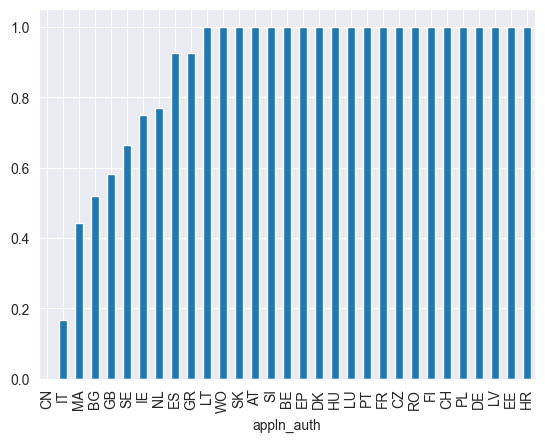

In [98]:
appln_pers.groupby('appln_auth')["person_ctry_code"].apply(lambda x: 1-(x.isnull().sum()/len(x))).sort_values().plot(kind="bar",)

In [101]:
appln_pers.query("appln_auth=='IC'").merge(appln[["appln_filing_year","appln_id"]].drop_duplicates(), on='appln_id').groupby('appln_filing_year')["person_ctry_code"].apply(lambda x: round(100-(x.isnull().sum()/len(x))*100,3)).plot(kind="line", title="")

TypeError: no numeric data to plot

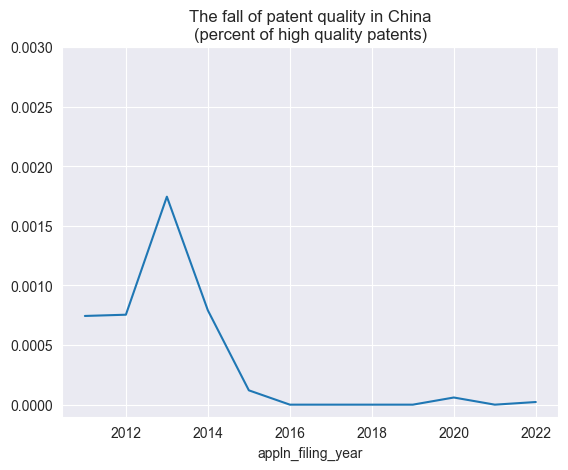

In [115]:
ds3 = appln_pers.query("appln_auth=='CN'").merge(appln[["appln_filing_year","appln_id"]].drop_duplicates(), on='appln_id').groupby('appln_filing_year')["person_ctry_code"].apply(lambda x: (100-(x.isnull().sum()/len(x))*100)).plot(kind="line", title="The fall of patent quality in China\n(percent of high quality patents)", ylim=[-0.0001,0.003])

In [ ]:
 # appln_pers.query("appln_auth=='CN'").merge(appln[["appln_filing_year","appln_id"]].drop_duplicates(), on='appln_id').groupby('appln_filing_year')["person_ctry_code"].apply(lambda x: (100-(x.isnull().sum()/len(x))*100))

In [125]:
appln_pers.query("appln_auth=='CN'").merge(appln[["appln_filing_year","appln_id"]].drop_duplicates(), on='appln_id').groupby('appln_filing_year')["person_ctry_code"].apply(lambda x: 100-((x.isnull().sum()/len(x))*100)).reset_index().to_excel("ds3.xlsx", index=False)

In [123]:
appln.query("appln_auth=='CN'").groupby("appln_filing_year")["appln_id"].nunique().cumsum().reset_index().to_excel("ds2.xlsx", index=False)

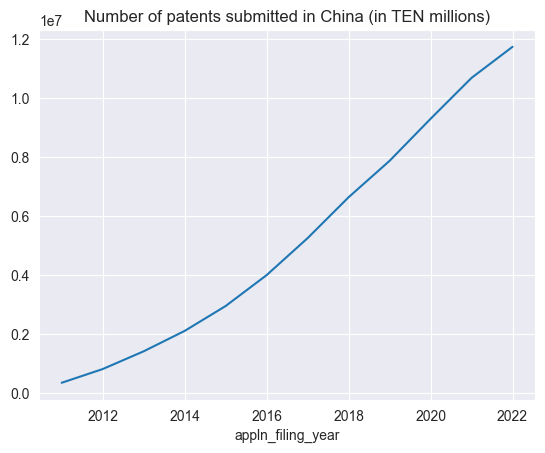

In [113]:
ds2 = appln.query("appln_auth=='CN'").groupby("appln_filing_year")["appln_id"].nunique().cumsum().plot(kind="line", title="Number of patents submitted in China (in TEN millions)")

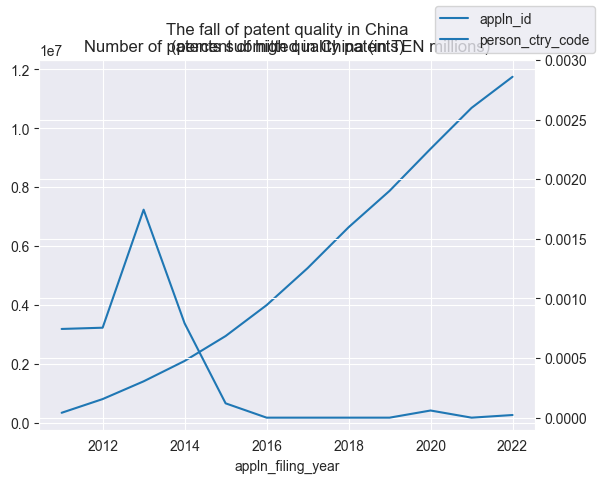

In [117]:
import seaborn as sns

ax = appln.query("appln_auth=='CN'").groupby("appln_filing_year")["appln_id"].nunique().cumsum().plot(kind="line")
ax2 = ax.twinx()
appln_pers.query("appln_auth=='CN'").merge(appln[["appln_filing_year","appln_id"]].drop_duplicates(), on='appln_id').groupby('appln_filing_year')["person_ctry_code"].apply(lambda x: (100-(x.isnull().sum()/len(x))*100)).plot(kind="line", ylim=[-0.0001,0.003])
# df.plot(x="date", y="column2", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

<Axes: xlabel='appln_filing_year'>

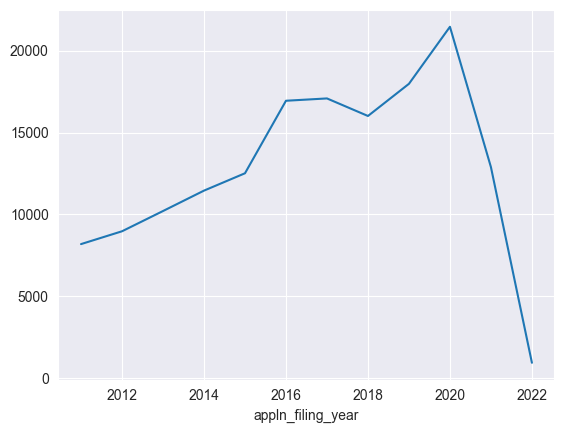

In [83]:
appln.query("appln_auth=='WO'").groupby("appln_filing_year")["appln_id"].nunique().plot(kind="line")

In [54]:
ch_auth_pers = appln_pers.query("appln_auth=='CN'")["person_ctry_code"].value_counts(dropna=False).reset_index()


In [56]:
ch_auth_pers.fillna("UNKNOWN")

person_ctry_code     count
0          UNKNOWN  50476312
1               CN        79
2               JP         8
3               TW         4
4               DE         4
5               FR         2

In [49]:
# appln_ch = appln_pers.groupby("appln_id").filter(lambda gr: (gr["person_ctry_code"] == "CN").any())
# appln_scope = appln_ch.groupby("appln_id").filter(lambda gr: (gr["person_ctry_code"].isin(scope_countries)).any())
# appln_scope.sample(100)

In [20]:
import numpy as np

In [23]:
appln_ch_ids = appln_pers[appln_pers["person_ctry_code"] == "CN"]["appln_id"].unique()
appln_eu_ids = appln_pers[appln_pers["person_ctry_code"].isin(scope_countries)]["appln_id"].unique()

appln_scope_ids = np.intersect1d(appln_ch_ids, appln_eu_ids, assume_unique=False)

In [37]:
appln_scope = appln_pers[((appln_pers["appln_id"].isin(appln_scope_ids))&
                          (appln_pers["person_ctry_code"].isin(list(scope_countries)+["CN"])))]

In [45]:
appln_pers_haninfo = pd.read_csv(f"first_round/tls_206_scope_v2.csv", usecols=["person_id","han_id","han_name","psn_sector"])

In [46]:

appln_pers_haninfo["han_id"].nunique(), appln_scope["han_id"].nunique()

(6584667, 18789)

In [53]:
han_sect = appln_pers_haninfo[["han_id","psn_sector"]].groupby(['han_id'])['psn_sector'].agg(pd.Series.mode)

In [59]:
han_sect = han_sect.reset_index()

In [62]:
han_sect["psn_sector"] = han_sect["psn_sector"].apply(lambda y: "UNKNOWN" if len(y)==0 else y)

In [63]:
han_sect.sample(10)

han_id psn_sector
3976016  167526859    UNKNOWN
1544707  150315846    UNKNOWN
1031384  144076709    UNKNOWN
251660   114916086    COMPANY
4256551  170565063    UNKNOWN
5436213  179983755    UNKNOWN
2686293  159907707    UNKNOWN
3568687  164831483    UNKNOWN
5139105  177983993    UNKNOWN
968579   143805259    UNKNOWN

In [64]:
appln_scope = appln_scope.merge(han_sect, on="han_id")

In [38]:
appln_scope.shape

(53909, 9)

In [65]:
appln_scope.sample(10)

appln_id appln_auth  person_id  invt_seq_nr  applt_seq_nr   
11387  507242787         WO    5262071            0             1  \
8226   552675100         WO    5318110            0             1   
22721  376063059         WO   25690230            3             4   
48806  540543104         WO   51860538            2             3   
52709  575543924         WO   63630536            2             0   
42582  533357722         WO   47722168            3             0   
15378  576018852         WO   50069447            0             3   
42176  528369260         WO   50255341            3             4   
46235  524262213         WO   73281459            5             0   
51521  567061143         WO   71117487            3             0   

                                  person_name person_ctry_code     han_id   
11387  Telefonaktiebolaget LM Ericsson (publ)               SE      13378  \
8226            Huawei Technologies Co., Ltd.               CN    1337324   
22721                            ZOU, YANMING               CN  125690230   
48806                             XIE, JIEWEI               CN  151860538   
52709                           LI, Xiangyang               CN  163630536   
42582                           YANG, WENLONG               CN  147722168   
15378                   NOKIA TECHNOLOGIES OY               FI    2562294   
42176                               TIAN, KAI               CN  150255341   
46235                             FAN, Cunfei               CN  173281459   
51521                           Lin, Shengdie               CN  171117487   

                          han_name  psn_sector  
11387  TELEFON AB LM ERICSSON PUBL     COMPANY  
8226            HUAWEI TECH CO LTD     COMPANY  
22721                 ZOU, YANMING  INDIVIDUAL  
48806                  XIE, JIEWEI  INDIVIDUAL  
52709                LI, Xiangyang  INDIVIDUAL  
42582                YANG, WENLONG  INDIVIDUAL  
15378               NOKIA TECH LTD     COMPANY  
42176                    TIAN, KAI  INDIVIDUAL  
46235                  FAN, Cunfei     UNKNOWN  
51521                Lin, Shengdie     UNKNOWN

In [111]:
appln_scope.query("appln_auth=='CN'")

appln_id appln_auth  person_id  invt_seq_nr  applt_seq_nr   
124  419052362         CN    5361204            0             1  \
137  419052362         CN   51988464            1             0   

                           person_name person_ctry_code     han_id   
124  Schneider Electric Industries SAS               FR     808003  \
137                       JUZHONG SONG               CN  151988464   

                    han_name psn_sector  
124  SCHNEIDER ELECT IND SAS    COMPANY  
137             JUZHONG SONG    UNKNOWN

In [112]:
appln.query('appln_id==419052362')

appln_id appln_auth      appln_nr appln_kind appln_filing_date   
1568550  419052362         CN  201210551425          A        2012-12-18  \

         appln_filing_year appln_nr_original ipr_type receiving_office   
1568550               2012     2012105514252       PI              NaN  \

         internat_appln_id  ... earliest_pat_publn_id granted docdb_family_id   
1568550                  0  ...             419052363       Y        49886800  \

        inpadoc_family_id  docdb_family_size  nb_citing_docdb_fam   
1568550         413446088                  4                   15  \

        nb_applicants  nb_inventors  is_prior is_pct  
1568550             1             1         1      0  

[1 rows x 28 columns]

In [85]:
appln_scope.query('appln_id==507242787')

appln_id appln_auth  person_id  invt_seq_nr  applt_seq_nr   
11387  507242787         WO    5262071            0             1  \
22810  507242787         WO   43700357            1             2   

                                  person_name person_ctry_code     han_id   
11387  Telefonaktiebolaget LM Ericsson (publ)               SE      13378  \
22810                                WEN, GAN               CN  143700357   

                          han_name  psn_sector  
11387  TELEFON AB LM ERICSSON PUBL     COMPANY  
22810                     WEN, GAN  INDIVIDUAL

<Axes: title={'center': 'Number of patents produced in EU-China collaborations\n(by location, 2011-2022)'}, ylabel='appln_auth'>

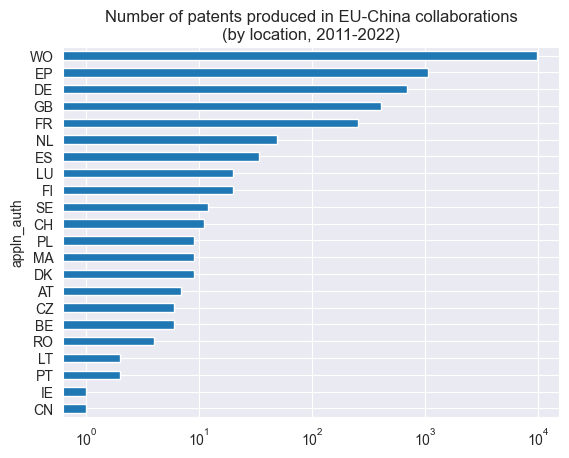

In [95]:
appln_scope.groupby("appln_auth")["appln_id"].nunique().sort_values(ascending=True).plot(kind="barh", logx=True, title='Number of patents produced in EU-China collaborations\n(by location, 2011-2022)')

In [124]:
appln_scope.groupby("appln_auth")["appln_id"].nunique().sort_values(ascending=True).reset_index().merge(tls_801, left_on="appln_auth",right_on="ctry_code").to_excel("ds1.xlsx", index=False)

In [119]:
tls_801

ctry_code iso_alpha3                          st3_name organisation_flag   
0          AD        AND                           Andorra                    \
1          AE        ARE              United Arab Emirates                     
2          AF        AFG                       Afghanistan                     
3          AG        ATG               Antigua and Barbuda                     
4          AI        AIA                          Anguilla                     
..        ...        ...                               ...               ...   
235        YE        YEM                             Yemen                     
236        YU        YUG  Yugoslavia/Serbia and Montenegro                     
237        ZA        ZAF                      South Africa                     
238        ZM        ZMB                            Zambia                     
239        ZW        ZWE                          Zimbabwe                     

         continent eu_member epo_member oecd_member discontinued  
0           Europe                                                
1             Asia                                                
2             Asia                                                
3    North America                                                
4    North America                                                
..             ...       ...        ...         ...          ...  
235           Asia                                                
236         Europe                                             Y  
237         Africa                                                
238         Africa                                                
239         Africa                                                

[240 rows x 9 columns]

In [40]:
appln_scope["appln_auth"].value_counts()

appln_auth
WO    43113
EP     4340
DE     3189
GB     1375
FR     1042
NL      167
ES      165
LU       98
FI       69
RO       53
PL       49
MA       42
CZ       40
CH       38
SE       33
AT       27
DK       21
BE       19
LT       15
PT        9
IE        3
CN        2
Name: count, dtype: int64

In [3]:
outdir="EU_CH_scope"

appln = pd.read_csv(f"{outdir}/tls_201_scope.csv")

In [4]:
len(appln)

65136

In [5]:
len(appln[appln["appln_nr"]==appln["appln_nr_original"]])

24638

In [6]:
appln.sample(10)

appln_id appln_auth      appln_nr appln_kind appln_filing_date   
59726  568635720         DE  102021125268         A         2021-09-29  \
12204  421520760         WO    2013071985         W         2013-02-28   
41470  519271319         US  201729627257         F         2017-11-24   
21565  456717830         TW     103144389         A         2014-12-18   
39245  513507702         TW     107123773         A         2018-07-10   
15067  437950387         CA       2882927         A         2013-09-11   
2331   365201373         US  201113309201         A         2011-12-01   
42558  521483818         WO    2019079482         W         2019-10-29   
54938  552149434         WO    2021065120         W         2021-06-07   
63211  580342075         CO    2022012975         A         2022-09-13   

       appln_filing_year appln_nr_original ipr_type receiving_office   
59726               2021      102021125268       PI                   \
12204               2013     CN2013/071985       PI               CN   
41470               2017          29627257       DP                    
21565               2014         103144389       PI                    
39245               2018         107123773       PI                    
15067               2013           2882927       PI                    
2331                2011          13309201       PI                    
42558               2019     EP2019/079482       PI               EP   
54938               2021     EP2021/065120       PI               EP   
63211               2022    NC2022/0012975       PI                    

       internat_appln_id  ... earliest_publn_date earliest_publn_year   
59726                  0  ...          2022-03-31                2022  \
12204                  0  ...          2014-09-04                2014   
41470                  0  ...          2019-09-17                2019   
21565                  0  ...          2016-03-16                2016   
39245                  0  ...          2019-03-01                2019   
15067          410236729  ...          2014-03-20                2014   
2331           332837342  ...          2012-07-19                2012   
42558                  0  ...          2021-05-06                2021   
54938                  0  ...          2022-12-15                2022   
63211          901633858  ...          2022-09-30                2022   

      earliest_pat_publn_id granted  docdb_family_id  inpadoc_family_id   
59726             568635721       N         80624731          568635720  \
12204             421520761       N         51427475          421502712   
41470             519271320       Y         67875052          519271319   
21565             456717831       Y         52302387          425594478   
39245             513507703       N         59501519          481695409   
15067             437950388       Y         49165740          378704661   
2331              365309255       Y         46490250          332836199   
42558             550107980       N         68468669          521483818   
54938             584644443       N         76355503          552149434   
63211             580342076       N         74870863          547347540   

      docdb_family_size  nb_citing_docdb_fam  nb_applicants nb_inventors  
59726                 3                    0              1            6  
12204                 5                    0              2            1  
41470                 1                    0              1            2  
21565                46                    6              1            7  
39245                 2                    0              1            6  
15067                35                    2              2            8  
2331                  1                    3              7            6  
42558                 1                    0              2            2  
54938                 1                    0              2            2  
63211               

In [7]:
appln[appln["appln_nr"]==appln["appln_nr_original"]].sample(100)

appln_id appln_auth    appln_nr appln_kind appln_filing_date   
24368  472782127         EP    16808728         A         2016-11-15  \
21272  456135686         EP    14905672         A         2014-11-15   
21690  456935297         CA     2932236         A         2014-12-17   
23267  469974134         TW   104128490         A         2015-08-28   
24227  472426897         TW   105101423         A         2016-01-18   
...          ...        ...         ...        ...               ...   
5372   405824062         TW   101108520         A         2012-03-13   
15441  438564193         EP    14847669         A         2014-09-18   
27761  481859764         TW   105133993         A         2016-10-21   
23898  471377037         CL  2015002557         A         2015-09-09   
20776  451149018         TW   104112868         A         2015-04-22   

       appln_filing_year appln_nr_original ipr_type receiving_office   
24368               2016          16808728       PI                   \
21272               2014          14905672       PI                    
21690               2014           2932236       PI                    
23267               2015         104128490       PI                    
24227               2016         105101423       PI                    
...                  ...               ...      ...              ...   
5372                2012         101108520       PI                    
15441               2014          14847669       PI                    
27761               2016         105133993       PI                    
23898               2015        2015002557       PI                    
20776               2015         104112868       PI                    

       internat_appln_id  ... earliest_publn_date earliest_publn_year   
24368          471904726  ...          2018-09-26                2018  \
21272          456128773  ...          2017-09-20                2017   
21690          424542770  ...          2015-07-09                2015   
23267                  0  ...          2016-07-16                2016   
24227                  0  ...          2016-09-01                2016   
...                  ...  ...                 ...                 ...   
5372                   0  ...          2013-01-01                2013   
15441          438547499  ...          2016-08-03                2016   
27761                  0  ...          2017-05-01                2017   
23898                  0  ...          2016-08-26                2016   
20776                  0  ...          2016-01-16                2016   

      earliest_pat_publn_id granted  docdb_family_id  inpadoc_family_id   
24368             498806476       N         57517914          471904726  \
21272             482714919       Y         55953638          456128773   
21690             456935298       N         49876509          424542770   
23267             469974135       Y         54238507          444673843   
24227             472426898       Y         52358602          447591949   
...                     ...     ...              ...                ...   
5372              405856720       N         45937460          352022356   
15441             457602632       N         52742141          438547499   
27761             481859765       Y         58562247          471178388   
23898             471377038       N         51537508          421989017   
20776             451149019       N         54147239          444402812   

      docdb_family_size  nb_citing_docdb_fam  nb_applicants nb_inventors  
24368                 3                    7              1            4  
21272                17                   35              1            6  
21690                 5                    6              2            4  
23267                49                   51              1           13  
24227                 8                   11              1            7  
...                 ...                  ...      

In [8]:

appln_title = pd.read_csv(f"{outdir}/tls_202_scope.csv")

pers = pd.read_csv(f"{outdir}/tls_206_scope.csv")
pers['psn_sector'] = pers['psn_sector'].fillna("UNKNOWN")

appln_pers = pd.read_csv(f"{outdir}/tls_207_scope.csv")

appln_cpc = pd.read_csv(f"{outdir}/tls_224_scope.csv")

cpc_def = pd.read_csv("CPC_data/cpc_defs.csv", low_memory=False)

In [9]:
pers.sample(10)

person_id           person_name   person_name_orig_lg   
70690    54633600          LONG, HUOJUN          LONG, HUOJUN  \
67675    53995974          ACCOU, BRUNO          ACCOU, BRUNO   
116777   81591947           RAMOS, Rita           RAMOS, Rita   
94905    71114319       VERSALIS S.P.A.       VERSALIS S.P.A.   
104848   74737285       ISAKSSON, Björn       ISAKSSON, Björn   
123893   83424775             LIU, Qian             LIU, Qian   
29588    40825214    MELEY, JEAN-PIERRE    MELEY, JEAN-PIERRE   
106912   76993952  PENG-POEHLER, Xuyuan  PENG-POEHLER, Xuyuan   
78798    56657638        TONG, Zhaoyang        TONG, Zhaoyang   
10578    11967242        Dai, Chenglong        Dai, Chenglong   

                                           person_address person_ctry_code   
70690                                            SHANGHAI               CN  \
67675            Sint Truidensestwg 263A B-3350 Linter BE               BE   
116777    Novartis Pharma AG, Postfach, 4002 Basel, SUIZA               PT   
94905                                                  IT               IT   
104848                                            Mölndal               SE   
123893                                         Otelfingen               CH   
29588                                                 NaN               FR   
106912                                                NaN               DE   
78798   Tyco Electronics (Shanghai) Co., Ltd.,F/G Sect...               CN   
10578                                            Shenzhen               CN   

       nuts  nuts_level  doc_std_name_id         doc_std_name     psn_id   
70690   NaN           9          1937752             SUN XIAO   19885311  \
67675    BE           0          2145736          ACCOU BRUNO     245616   
116777   PT           0          1921587           RAMOS RITA   26605720   
94905    IT           0           255948         VERSALIS SPA   34028198   
104848   SE           0         21757791       ISAKSSON BJÖRN   14166564   
123893   CH           0         18631517            QIAO NING  183424775   
29588    FR           0           178196    MELEY JEAN-PIERRE   21635951   
106912   DE           0         34255238  PENG-POEHLER XUYUAN   25270057   
78798   NaN           9          2067106        TONG ZHAOYANG   32942098   
10578   NaN           9          4323331        DAI CHENGLONG    6018020   

                    psn_name  psn_level  psn_sector     han_id   
70690           LONG, HUOJUN          0     UNKNOWN  154633600  \
67675           ACCOU, BRUNO          0     UNKNOWN  153995974   
116777           RAMOS, RITA          0     UNKNOWN  181591947   
94905               VERSALIS          1     COMPANY    3508224   
104848       ISAKSSON, BJÖRN          0     UNKNOWN  174737285   
123893             LIU, Qian          0     UNKNOWN  183424775   
29588     MELEY, JEAN-PIERRE          0     UNKNOWN  140825214   
106912  PENG-POEHLER, XUYUAN          0     UNKNOWN  176993952   
78798         TONG, ZHAOYANG          0     UNKNOWN  156657638   
10578         DAI, CHENGLONG          1  INDIVIDUAL  111967242   

                    han_name  han_harmonized  
70690           LONG, HUOJUN               0  
67675           ACCOU, BRUNO               0  
116777           RAMOS, Rita               0  
94905           VERSALIS SPA               2  
104848       ISAKSSON, Björn               0  
123893             LIU, Qian               0  
29588     MELEY, JEAN-PIERRE               0  
106912  PENG-POEHLER, Xuyuan               0  
78798         TONG, Zhaoyang               0  
10578         Dai, Chenglong               0

In [10]:
cpc_def

cpc_id                                           cpc_name   
0                  A                                  HUMAN NECESSITIES  \
1                A01  AGRICULTURE; FORESTRY; ANIMAL HUSBANDRY; HUNTI...   
2               A01B  SOIL WORKING IN AGRICULTURE OR FORESTRY; PARTS...   
3           A01B1/00  Hand tools (edge trimmers for lawns A01G3/06  ...   
4           A01B1/02  Spades; Shovels {(hand-operated dredgers E02F3...   
...              ...                                                ...   
260486  Y10T483/1873                                    Indexing matrix   
260487  Y10T483/1882                                        Rotary disc   
260488  Y10T483/1891                                      Chain or belt   
260489    Y10T483/19                                      Miscellaneous   
260490           NaN                                                NaN   

       section  class subclass  group  main_group  cpc_version   
0            A    NaN      NaN    NaN         NaN         2023  \
1            A    1.0      NaN    NaN         NaN         2023   
2            A    1.0        B    NaN         NaN         2023   
3            A    1.0        B    1.0         0.0         2023   
4            A    1.0        B    1.0         2.0         2023   
...        ...    ...      ...    ...         ...          ...   
260486       Y   10.0        T  483.0      1873.0         2023   
260487       Y   10.0        T  483.0      1882.0         2023   
260488       Y   10.0        T  483.0      1891.0         2023   
260489       Y   10.0        T  483.0        19.0         2023   
260490     NaN    NaN      NaN    NaN         NaN         2022   

               version https://git-lfs.github.com/spec/v1   
0                                                     NaN  \
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
260486                                                NaN   
260487                                                NaN   
260488                                                NaN   
260489                                                NaN   
260490  oid sha256:f138d6bdf2939ba576b96b633d81366123b...   

                                             cpc_taxonomy   
0                            [('A', 'HUMAN NECESSITIES')]  \
1       [('A', 'HUMAN NECESSITIES'), ('A01', 'AGRICULT...   
2       [('A', 'HUMAN NECESSITIES'), ('A01', 'AGRICULT...   
3       [('A', 'HUMAN NECESSITIES'), ('A01', 'AGRICULT...   
4       [('A', 'HUMAN NECESSITIES'), ('A01', 'AGRICULT...   
...                                                   ...   
260486  [('Y', 'GENERAL TAGGING OF NEW TECHNOLOGICAL D...   
260487  [('Y', 'GENERAL TAGGING OF NEW TECHNOLOGICAL D...   
260488  [('Y', 'GENERAL TAGGING OF NEW TECHNOLOGICAL D...   
260489  [('Y', 'GENERAL TAGGING OF NEW TECHNOLOGICAL D...   
260490                                                 []   

                                             cpc_fullname   
0                                       HUMAN NECESSITIES  \
1       HUMAN NECESSITIES<>AGRICULTURE; FORESTRY; ANIM...   
2       HUMAN NECESSITIES<>AGRICULTURE; FORESTRY; ANIM...   
3       HUMAN NECESSITIES<>AGRICULTURE; FORESTRY; ANIM...   
4       HUMAN NECESSITIES<>AGRICULTURE; FORESTRY; ANIM...   
...                                                   ...   
260486  GENERAL TAGGING OF NEW TECHNOLOGICAL DEVELOPME...   
260487  GENERAL TAGGING OF NEW TECHNOLOGICAL DEVELOPME...   
260488  GENERAL TAGGING OF NEW TECHNOLOGICAL DEVELOPME...   
260489  GENERAL TAGGING OF NEW TECHNOLOGICAL DEVELOPME...   
260490                                                NaN   

                                              tax_level_0   
0                                       HUMAN NECESSITIES  \

In [11]:
appln_cpc.sample(10)

appln_id cpc_class_symbol
48451   408996326    B01J  35/1019
361399  521927284     H04M  15/785
410341  535434338    H04L   5/0048
447944  546323648     H04L   5/005
128095  441829683   H01L2924/12041
183546  470030298    H04L   1/0005
74962   416447093    B65H2404/1119
382818  527400811      A61P  21/00
411680  535860118     A61K   8/365
289902  500408460      A61K   8/87

In [12]:
len(appln_pers)

325243

In [13]:
len(appln)

65136

In [14]:
# Number of collaborative applications


In [15]:
record_col = "appln_id"

In [16]:
os.getcwd()

'C:\\Users\\radvanyi\\PycharmProjects\\ZSI_analytics\\PATSTAT'

In [17]:
fromdir="first_round"

os.makedirs(fr'{fromdir}/plots', exist_ok=True)

In [18]:
appln_misc = pd.read_csv(f"{fromdir}/first-filings-raw.csv", header=None)#,
                      #names=["appln_id","appln_auth","person_id","invt_seq_nr","applt_seq_nr",'person_name',"person_ctry_code"])
appln_misc

0   1  2     3  4   5
0        43250057  SE  A  1964  1   2
1        43265240  SE  A  1969  1   2
2       365294032  DE  A  2009  1   1
3       353426804  DE  A  2009  1   1
4       335924788  DE  U  2010  1   0
...           ...  .. ..   ... ..  ..
773112  577173906  CN  A  2022  2  11
773113  580290535  CN  A  2022  1   1
773114  573161360  CN  A  2022  1   2
773115  576722128  CN  A  2022  2   9
773116  574827324  CN  A  2022  1   9

[773117 rows x 6 columns]

In [20]:
appln_misc = pd.read_csv(f"{fromdir}/first-filings-with-IPC-raw.csv", header=None)#,
                      #names=["appln_id","appln_auth","person_id","invt_seq_nr","applt_seq_nr",'person_name',"person_ctry_code"])
appln_misc

0   1  2     3  4  5             6  7
0         43250057  SE  A  1964  1  2   B21B  37/16  A
1         43250057  SE  A  1964  1  2   B21B  37/58  A
2         43250057  SE  A  1964  1  2   B21B  37/64  A
3         43265240  SE  A  1969  1  2   B65D  50/04  A
4        365294032  DE  A  2009  1  1   C10B  49/06  A
...            ...  .. ..   ... .. ..           ... ..
1719607  574827324  CN  A  2022  1  9  B01J  27/138  A
1719608  574827324  CN  A  2022  1  9   B01J  37/00  A
1719609  574827324  CN  A  2022  1  9   B01J  37/02  A
1719610  574827324  CN  A  2022  1  9   B01J  37/08  A
1719611  574827324  CN  A  2022  1  9   C01G  13/04  A

[1719612 rows x 8 columns]

In [21]:
appln_misc[2].value_counts()

2
A    1643149
U      76458
D          5
Name: count, dtype: int64

In [144]:
appln_colab = pd.read_csv(f"{fromdir}/first-filings-with-persons-raw.csv", header=None,
                      names=["appln_id","appln_auth","person_id","invt_seq_nr","applt_seq_nr",'person_name',"person_ctry_code"])


# appln_colab[appln_colab["appln_auth"]=="CN"]#.merge(appln_pers_haninfo, on="person_id")

appln_id appln_auth  person_id  invt_seq_nr  applt_seq_nr   
25       375269300         CN   41022193            0             1  \
26       375269300         CN   43986391            1             0   
64       336321508         CN   13960267            4             0   
65       336321508         CN   20214523            3             0   
66       336321508         CN   20440543            1             0   
...            ...        ...        ...          ...           ...   
2418562  563162779         CN   65016826            1             0   
2418563  563162779         CN   65604326            3             0   
2418564  563162779         CN   69335326            4             0   
2418565  563162779         CN   78241111            5             0   
2418566  563162779         CN   79926327            7             0   

                   person_name person_ctry_code  
25       LU WATA ESPOO COMPANY              NaN  
26                 DENG WENJIA              NaN  
64                  LI JIANGUO              NaN  
65                  YU YUEMING              NaN  
66                 CHEN XUEMIN              NaN  
...                        ...              ...  
2418562             GUO HONGYU              NaN  
2418563           ZHAO SHUFENG              NaN  
2418564                LI BING              NaN  
2418565             XU XIAOKAI              NaN  
2418566            LYU JINGHUI              NaN  

[1295204 rows x 7 columns]

In [157]:
appln_ch = appln_colab.groupby("appln_id").filter(lambda gr: (gr["person_ctry_code"]=="CN").any())
appln_scope = appln_ch.groupby("appln_id").filter(lambda gr: (gr["person_ctry_code"].isin(scope_countries)).any())
appln_scope

appln_id appln_auth  person_id  invt_seq_nr  applt_seq_nr   
1354     333078581         EP    4914457            1             0  \
1355     333078581         EP   49302649            0             1   
1659     365282689         DE    5567000            0             1   
1660     365282689         DE   40342643            2             0   
1661     365282689         DE   43139037            1             0   
...            ...        ...        ...          ...           ...   
2396509  557244566         EP   83213913            1             0   
2396510  557244566         EP   83239836            2             0   
2396534  557244564         EP   83170367            0             1   
2396535  557244564         EP   83213913            2             0   
2396536  557244564         EP   83239836            1             0   

                                         person_name person_ctry_code  
1354                                    Collins, Tom               BE  
1355                   Huawei Technologies Co., Ltd.               CN  
1659     Bayerische Motoren Werke Aktiengesellschaft               DE  
1660                                MOELLMANN, JOERG               DE  
1661                                 JOHN, CHRISTOPH               DE  
...                                              ...              ...  
2396509                          LASSERRE, SEBASTIEN               FR  
2396510                             TAQUET, JONATHAN               FR  
2396534     Beijing Xiaomi Mobile Software Co., Ltd.               CN  
2396535                          LASSERRE, SEBASTIEN               FR  
2396536                             TAQUET, JONATHAN               FR  

[4963 rows x 7 columns]

In [161]:
appln_scope.merge(appln_pers_haninfo, on="person_id")

appln_id appln_auth  person_id  invt_seq_nr  applt_seq_nr   
0     333078581         EP    4914457            1             0  \
1     365149571         EP    4914457            1             0   
2     379191760         EP    4914457            1             0   
3     333078581         EP   49302649            0             1   
4     339456534         EP   49302649            0             1   
...         ...        ...        ...          ...           ...   
4436  549690891         EP   85841201            1             0   
4437  549690895         EP   85841201            1             0   
4438  549690901         EP   85841201            1             0   
4439  549690897         EP   85841201            1             0   
4440  549788919         EP   85774895            2             0   

                        person_name person_ctry_code psn_sector     han_id   
0                      Collins, Tom               BE        NaN  104914457  \
1                      Collins, Tom               BE        NaN  104914457   
2                      Collins, Tom               BE        NaN  104914457   
3     Huawei Technologies Co., Ltd.               CN    COMPANY    1337324   
4     Huawei Technologies Co., Ltd.               CN    COMPANY    1337324   
...                             ...              ...        ...        ...   
4436                  JONSSON, Tony               SE    UNKNOWN  185841201   
4437                  JONSSON, Tony               SE    UNKNOWN  185841201   
4438                  JONSSON, Tony               SE    UNKNOWN  185841201   
4439                  JONSSON, Tony               SE    UNKNOWN  185841201   
4440            TRAN NGUYEN, Johnny               SE    UNKNOWN  185774895   

                 han_name  
0            Collins, Tom  
1            Collins, Tom  
2            Collins, Tom  
3      HUAWEI TECH CO LTD  
4      HUAWEI TECH CO LTD  
...                   ...  
4436        JONSSON, Tony  
4437        JONSSON, Tony  
4438        JONSSON, Tony  
4439        JONSSON, Tony  
4440  TRAN NGUYEN, Johnny  

[4441 rows x 10 columns]

In [160]:
appln_scope["appln_id"].nunique()

1155

In [162]:
appln_scope[appln_scope["person_ctry_code"]=="GB"].merge(appln_pers_f, on="person_id")

Empty DataFrame
Columns: [appln_id_x, appln_auth_x, person_id, invt_seq_nr_x, applt_seq_nr_x, person_name_x, person_ctry_code_x, appln_id_y, appln_auth_y, invt_seq_nr_y, applt_seq_nr_y, person_name_y, person_ctry_code_y, psn_sector, han_id, han_name, psn_sector_primary, person_ctry_code_fullname, appln_auth_fullname, person_ctry_ISO3, person_ctry_type, auth_ISO3, auth_ctry_type]
Index: []

[0 rows x 23 columns]

In [153]:
appln_colab[((appln_colab["appln_auth"]=="GB")&(appln_colab["person_ctry_code"]=="CN"))]

appln_id appln_auth  person_id  invt_seq_nr  applt_seq_nr   
6810     333031060         GB   42380482            1             0  \
27291    334469711         GB   42552873            0             1   
31935    336159242         GB    5318110            0             1   
55322    333031012         GB   42013453            1             1   
128151   337007702         GB    5318110            0             1   
...            ...        ...        ...          ...           ...   
2130509  546501618         GB   87463236            1             0   
2135530  546434937         GB   20149035            3             0   
2135533  546434937         GB   88227411            0             2   
2210955  550995729         GB   17999648            2             0   
2210971  550995769         GB   17999648            2             0   

                              person_name person_ctry_code  
6810                KA-SHUN CARRISON TONG               CN  
27291       LE GROUP OF COMPANIES LIMITED               CN  
31935       Huawei Technologies Co., Ltd.               CN  
55322              BENJAMINO KAH HUNG LEE               CN  
128151      Huawei Technologies Co., Ltd.               CN  
...                                   ...              ...  
2130509  Santiago Ramon Alvarez Fernandez               CN  
2135530                           YU HUAI               CN  
2135533      PICOCOM (HANGZHOU) CO., LTD.               CN  
2210955                         ZHANG LIN               CN  
2210971                         ZHANG LIN               CN  

[278 rows x 7 columns]

In [163]:
appln_ch = appln_colab.groupby("appln_id").filter(lambda gr: (gr["person_ctry_code"]=="CN").any())
appln_scope = appln_ch.groupby("appln_id").filter(lambda gr: (gr["person_ctry_code"].isin(scope_countries)).any())

print(appln_scope["appln_id"].nunique())


1155


In [242]:
appln_pers_f = pd.read_csv(f"{fromdir}/first-filings-with-persons-raw.csv", header=None,
                      names=["appln_id","appln_auth","person_id","invt_seq_nr","applt_seq_nr",'person_name',"person_ctry_code"])


appln_ch = appln_pers_f.groupby("appln_id").filter(lambda gr: (gr["person_ctry_code"]=="CN").any())
appln_scope = appln_ch.groupby("appln_id").filter(lambda gr: (gr["person_ctry_code"].isin(scope_countries)).any())

print(appln_scope["appln_id"].nunique())

1155


In [243]:
appln_pers_haninfo = pd.read_csv(f"{fromdir}/tls_206_scope.csv", usecols=["person_id","han_id","han_name","psn_sector"])

appln_pers_haninfo["han_name"] = appln_pers_haninfo["han_name"].str.replace("Zhejiang Geely Holding Group Co., Ltd.",
                                                                            "ZHEJIANG GEELY HOLDINGGROUP CO LTD")


appln_pers_haninfo.loc[appln_pers_haninfo["han_name"]=="ZHEJIANG GEELY HOLDINGGROUP CO LTD","han_id"] = 3345915

appln_pers_f = appln_scope.merge(appln_pers_haninfo[["person_id","han_id","han_name"]].drop_duplicates(), on="person_id")
print(appln_pers_f["appln_id"].nunique())

1155


In [244]:
pers_sector_primary = pers.groupby("han_id", as_index=False)["psn_sector"].agg(
    lambda x: pd.Series.mode(x)[0]).rename(columns={"psn_sector":"psn_sector_primary"})
appln_pers_f = appln_pers_f.merge(pers_sector_primary, on='han_id', how="left")
appln_pers_f["psn_sector_primary"] = appln_pers_f["psn_sector_primary"].fillna("UNKNOWN")
print(appln_pers_f["appln_id"].nunique())

1155


In [245]:
print(appln_pers_f["appln_id"].nunique(), appln_scope["appln_id"].nunique())

1155 1155


In [246]:
tls_801 = pd.read_csv(r"./EU_CH_scope/table_tls801.csv", low_memory=False)
# tls_801.head()
scope_df = tls_801[((tls_801.eu_member=="Y")|
                      (tls_801.ctry_code == 'NO')|
                      (tls_801.ctry_code == 'CH')|
                      (tls_801.ctry_code == 'GB'))]
scope_countries = scope_df["ctry_code"].unique()

In [247]:
appln_pers_f = appln_pers_f[appln_pers_f["person_ctry_code"].isin(list(scope_countries)+["CN"])]
print(appln_pers_f["appln_id"].nunique(), appln_scope["appln_id"].nunique())

1155 1155


In [248]:
list(scope_countries)+["CN"]

['AT',
 'BE',
 'BG',
 'CH',
 'CY',
 'CZ',
 'DE',
 'DK',
 'EE',
 'ES',
 'FI',
 'FR',
 'GB',
 'GR',
 'HR',
 'HU',
 'IE',
 'IT',
 'LT',
 'LU',
 'LV',
 'MT',
 'NL',
 'NO',
 'PL',
 'PT',
 'RO',
 'SE',
 'SI',
 'SK',
 'CN']

In [249]:
appln_pers_f

appln_id appln_auth  person_id  invt_seq_nr  applt_seq_nr   
0     333078581         EP    4914457            1             0  \
1     365149571         EP    4914457            1             0   
2     379191760         EP    4914457            1             0   
3     333078581         EP   49302649            0             1   
4     339456534         EP   49302649            0             1   
...         ...        ...        ...          ...           ...   
4958  549690891         EP   85841201            1             0   
4959  549690895         EP   85841201            1             0   
4960  549690901         EP   85841201            1             0   
4961  549690897         EP   85841201            1             0   
4962  549788919         EP   85774895            2             0   

                        person_name person_ctry_code     han_id   
0                      Collins, Tom               BE  104914457  \
1                      Collins, Tom               BE  104914457   
2                      Collins, Tom               BE  104914457   
3     Huawei Technologies Co., Ltd.               CN    1337324   
4     Huawei Technologies Co., Ltd.               CN    1337324   
...                             ...              ...        ...   
4958                  JONSSON, Tony               SE  185841201   
4959                  JONSSON, Tony               SE  185841201   
4960                  JONSSON, Tony               SE  185841201   
4961                  JONSSON, Tony               SE  185841201   
4962            TRAN NGUYEN, Johnny               SE  185774895   

                 han_name psn_sector_primary  
0            Collins, Tom            UNKNOWN  
1            Collins, Tom            UNKNOWN  
2            Collins, Tom            UNKNOWN  
3      HUAWEI TECH CO LTD            COMPANY  
4      HUAWEI TECH CO LTD            COMPANY  
...                   ...                ...  
4958        JONSSON, Tony            UNKNOWN  
4959        JONSSON, Tony            UNKNOWN  
4960        JONSSON, Tony            UNKNOWN  
4961        JONSSON, Tony            UNKNOWN  
4962  TRAN NGUYEN, Johnny            UNKNOWN  

[4814 rows x 10 columns]

In [250]:
appln_f = pd.read_csv(f"{fromdir}/first-filings-raw.csv", header=None,
                      names=["appln_id","appln_auth","appln_kind","filing_year","nb_applicants",'nb_inventors'])

appln_f["filing_year"] = appln_f["filing_year"].astype(int)

appln_f = appln_f[appln_f["filing_year"]>2010]

appln_f["appln_auth"] = appln_f["appln_auth"].str.replace("MA","CN")

appln_f = appln_f[appln_f["appln_id"].isin(appln_scope['appln_id'])]
print(appln_f["appln_id"].nunique())

appln_f.sample(100)

1155


appln_id appln_auth appln_kind  filing_year  nb_applicants   
3246    331546756         EP          A         2011              1  \
194962  448860230         DE          A         2014              1   
588485  513966940         EP          A         2019              1   
206034  416859711         EP          A         2014              1   
670021  532224185         EP          A         2020              2   
...           ...        ...        ...          ...            ...   
460742  491633486         EP          A         2018              1   
275339  446738785         FR          A         2015              1   
505075  504869364         EP          A         2018              1   
474988  524089197         DE          A         2018              1   
567305  509177273         EP          A         2019              1   

        nb_inventors  
3246               1  
194962             3  
588485             1  
206034             2  
670021             2  
...              ...  
460742             3  
275339             3  
505075             4  
474988             6  
567305             1  

[100 rows x 6 columns]

In [251]:
appln_f["appln_kind"].value_counts()

appln_kind
A    1164
U       7
Name: count, dtype: int64

In [252]:
# Co-patents per year

In [253]:
data = (appln_f.groupby(['filing_year'])[record_col].nunique(dropna=False)
        .reset_index()
        .rename(columns={0:record_col}))
data[record_col+"_relative_growth"] = data[data[record_col]>0].sort_values(by=["filing_year"], ascending=True)[record_col][0]
data[record_col+"_relative_growth"] = (data[record_col]-data[record_col+"_relative_growth"])/data[record_col+"_relative_growth"]

data = data.sort_values(by =["filing_year"], ascending=[True])
data[record_col+"_cumsum"] = (data[record_col].cumsum())

year_output = px.line(data,x="filing_year", y=record_col, markers=True, text=record_col)
year_output.update_traces(textposition='top center',textfont_size=12)
year_output.update_traces(hovertemplate='Year:%{x:d}<br>Number of co-publications:%{y:d}')

year_rel_output = px.line(data,x="filing_year", y=record_col+"_relative_growth", markers=True, text=record_col+"_relative_growth")
year_rel_output.update_traces(textposition='top center',textfont_size=12, texttemplate='%{y:.0%}')
year_rel_output.update_traces(hovertemplate='Year:%{x:d}<br>Rel.growth in co-publications:%{y:.0%}')

figsuper = make_subplots(rows=2, cols=1, subplot_titles=["Co-patents per year","Relative growth of co-patents"],
                         specs=[
                            [{"type": "xy"}],
                            [{"type": "xy"}]
                         ])

for trace in list(year_output.select_traces()):
    figsuper.add_trace(trace,
        row=1, col=1
    )

for trace in list(year_rel_output.select_traces()):
    figsuper.add_trace(trace,
        row=2, col=1
    )

figsuper.update_layout(yaxis={'categoryorder':'total ascending'}, barmode='relative')
figsuper.update_yaxes(
    showgrid=True,showline=True, linewidth=1, linecolor='black', mirror=True,
    ticks="outside")
figsuper.update_xaxes(
    showgrid=True,showline=True, linewidth=1, linecolor='black', mirror=True,
    ticks="outside")
figsuper.update_layout({'template':"plotly","font_family":"Montserrat"})
figsuper['layout']['yaxis2'].update(zerolinecolor='grey',tickformat=".0%")
# for i in["xaxis","xaxis2"]:
#     figsuper['layout'][f'{i}']["range"] = [2010.8,2022.5]
#
figsuper['layout']["yaxis"]["range"] = [0,250]
figsuper['layout']["yaxis2"]["range"] = [-1,3.5]
#
# figsuper['layout']['yaxis'].update(tickformat=".0f")
# figsuper['layout']['yaxis3'].update(tickformat=".0f")

figsuper.show(config= dict(displayModeBar = False, responsive = True),height=800,width=1600,scale = 4)

figsuper.write_image(f"{fromdir}/plots/overall_distr&trends.png",height=900,width=900,scale = 4)

In [254]:
data = (appln_f.groupby(['filing_year',"appln_auth"])[record_col]
        .nunique(dropna=False).unstack()
        .fillna(0)
        .stack()
        .reset_index()
        .rename(columns={0:record_col}))

data["appln_auth"].str.replace("MO","CN")

data = data.merge(data[data[record_col]>0].sort_values(by=["filing_year"], ascending=True).drop_duplicates(subset="appln_auth"),
                  on=["appln_auth"], suffixes=[None,"_relative_growth"])
data[record_col+"_relative_growth"] = (data[record_col]-data[record_col+"_relative_growth"])/data[record_col+"_relative_growth"]
data = data.sort_values(by =["appln_auth","filing_year"], ascending=[True,True])
data[record_col+"_cumsum"] = (data.groupby('appln_auth',as_index=False)[record_col].cumsum())
data["Country"] = cc.pandas_convert(series=data["appln_auth"], to='name_short')
data["Country"] = data["Country"].str.replace("not found","European Patent Office")


fig = px.line(data.sort_values(ascending=True, by='filing_year'),
              y=record_col,
              x='filing_year'
              ,facet_col="Country",facet_col_wrap=5,category_orders={"Country": sorted(data["Country"].unique())},
              markers=True,
              labels={
                     record_col: 'Number of co-patents',
                 },
                title="Yearly output of co-patents by patent authority",hover_name= "Country")
fig.update_traces(hovertemplate='<b>%{hovertext}</b><br>%{x}<br>Co-publications: %{y}')
fig.update_yaxes(
    showgrid=True,showline=True, linewidth=1, linecolor='black', mirror=True,
    ticks="outside")
fig.update_xaxes(
    showgrid=True,showline=True, linewidth=1, linecolor='black', mirror=True,
    ticks="outside")
fig.update_layout({'template':"plotly"},font_family="Montserrat")
fig.update_yaxes(title='')
fig.update_xaxes(title='')
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
# fig.show(config= dict(displayModeBar = False, responsive = True))
figsuper_ppt = go.Figure(fig)

figsuper_ppt['layout']["font"]["size"]=22
# figsuper['layout']["xaxis"]["range"] = [20,2022.5]
for a in figsuper_ppt['layout']["annotations"]:
    a["font"]["size"] = 22

s=16
figsuper_ppt.update_yaxes(tickfont=dict(size=s))
figsuper_ppt.update_xaxes(tickfont=dict(size=s),tickangle=45)
figsuper_ppt.show(height=800,width=1600,scale = 4)
figsuper_ppt.write_image(f"{fromdir}/plots/yearly_outputs.png",height=800,width=1600,scale = 4)

EP not found in ISO2


In [255]:
fig = px.line(data.sort_values(ascending=True, by='filing_year'),
              y=record_col+"_relative_growth",
              x='filing_year'
              ,facet_col="Country",facet_col_wrap=5,category_orders={"Country": sorted(data["Country"].unique())},
              markers=True,
              labels={
                    record_col+"_relative_growth": 'Relative growth of co-patents (%)',
                 },
                title="Yearly rel. output of co-patents by patent authority",hover_name= "Country")
fig.update_traces(hovertemplate='<b>%{hovertext}</b><br>%{x}<br>Co-publications: %{y}')
fig.update_yaxes(
    showgrid=True,showline=True, linewidth=1, linecolor='black', mirror=True,
    ticks="outside")
fig.update_xaxes(
    showgrid=True,showline=True, linewidth=1, linecolor='black', mirror=True,
    ticks="outside")
fig.update_layout({'template':"plotly"},font_family="Montserrat")
fig.update_yaxes(title='')
fig.update_xaxes(title='')
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
# fig.show(config= dict(displayModeBar = False, responsive = True))

figsuper_ppt = go.Figure(fig)

figsuper_ppt['layout']["font"]["size"]=22
for a in figsuper_ppt['layout']["annotations"]:
    a["font"]["size"] = 22

s=16
figsuper_ppt.update_yaxes(title='',zeroline=True, zerolinewidth=2, zerolinecolor='grey',tickformat=".0%")
figsuper_ppt.update_yaxes(tickfont=dict(size=s))
figsuper_ppt.update_xaxes(tickfont=dict(size=s),tickangle=45)
figsuper_ppt.show(height=800,width=1600,scale = 4)
figsuper_ppt.write_image(f"{fromdir}/plots/yearly_rel_outputs.png",height=800,width=1600,scale = 4)

In [256]:
# appln_pers_f = pd.read_csv(f"{outdir}/first-filings-with-persons-raw.csv", header=None,
#                       names=["appln_id","appln_auth","person_id","invt_seq_nr","applt_seq_nr",'person_name',"person_ctry_code"])

# appln_pers_haninfo = pd.read_csv(f"{outdir}/tls_206_scope.csv", usecols=["person_id","han_id","han_name","psn_sector"])
#
# appln_pers_f = appln_pers_f.merge(appln_pers_haninfo, on="person_id")
#
# tls_801 = pd.read_csv(r"./EU_CH_scope/table_tls801.csv", low_memory=False)
# # tls_801.head()
# scope_df = tls_801[((tls_801.eu_member=="Y")|
#                       (tls_801.ctry_code == 'CN')|
#                       (tls_801.ctry_code == 'NO')|
#                       (tls_801.ctry_code == 'CH')|
#                       (tls_801.ctry_code == 'UK'))]
# scope_countries = scope_df["ctry_code"].unique()
#
# appln_pers_f = appln_pers_f[appln_pers_f["person_ctry_code"].isin(scope_countries)]

for c in ["person_ctry_code","appln_auth"]:
    appln_pers_f[c+"_fullname"] = cc.pandas_convert(series=appln_pers_f[c], to='name_short')

appln_pers_f["appln_auth_fullname"] = appln_pers_f["appln_auth_fullname"].str.replace("not found","European Patent Office")
appln_pers_f["person_ctry_ISO3"] = cc.pandas_convert(series=appln_pers_f["person_ctry_code_fullname"], to='ISO3')
appln_pers_f["person_ctry_type"] = appln_pers_f["person_ctry_ISO3"].apply(lambda x: "China" if x == "CHN" else "Non-EU associate" if x in ["GBR","CHE","NOR"] else "EU")

appln_pers_f["auth_ISO3"] = cc.pandas_convert(series=appln_pers_f["appln_auth_fullname"], to='ISO3')
appln_pers_f["auth_ctry_type"] = appln_pers_f["auth_ISO3"].apply(lambda x: "China" if x == "CHN" else "Non-EU associate" if x in ["GBR","CHE","NOR"] else "EU" if x!='not found' else "EPO")

# top 25
# - inventor
# - applicant
# in china, EU, EUextended
color_discrete_map= {'China': '#EF553B',
                    'EU': '#636EFA',
                    'Non-EU associate': '#00CC96',
                     'EPO':'#9F2B68'}

labeld_dict = dict({
                     record_col: 'Number of co-patents',
                     "person_ctry_type": "Country type",
    "psn_sector_primary":"Sector",
                                  "han_label": "Name",
                                  "Country_Type":"Country type",
                                  "Eurovoc_Class":"Region"
                 })
for trait in  ["person_ctry_type","psn_sector_primary"]:
    for ctry in ["China",'EU']:
        ctry_subset = appln_pers_f[appln_pers_f["person_ctry_type"].str.contains(ctry)]
        # for role in ["invt","applt"]:
        if True:
            role = "applt"
            pers_sub = ctry_subset[ctry_subset[role+"_seq_nr"]!=0]
            data = (pers_sub
                     .groupby(["han_id",'han_name'],as_index=False)
                     .agg({'appln_id': 'nunique', 'person_ctry_ISO3': 'first',trait:"first"})
                     .sort_values(by="appln_id", ascending=False)
                    .head(15))
            data["han_label"] = (data["han_name"]
                                 .str.upper()
                                 .str.strip(".")
                                 .str.replace("&","<br>")
                                 + " ("+data["person_ctry_ISO3"]+")")

            fig = px.bar(data, x=record_col, y="han_label", color=trait,
                         color_discrete_map=color_discrete_map,text_auto=True,labels=labeld_dict)
            fig.update_layout(font_family="Montserrat",
                          yaxis={'categoryorder':'total ascending'})

            figsuper = fig
            figsuper.update_layout(yaxis={'categoryorder':'total ascending'}, barmode='relative',yaxis2={'categoryorder':'total ascending'},yaxis3={'categoryorder':'total ascending'})
            figsuper.update_yaxes(
                showgrid=True,showline=True, linewidth=1, linecolor='black', mirror=True,
                ticks="outside")
            figsuper.update_xaxes(
                showgrid=True,showline=True, linewidth=1, linecolor='black', mirror=True,
                ticks="outside")
            figsuper.update_layout({'template':"plotly","font_family":"Montserrat"})

            figsuper['layout']["font"]["size"]=12
            for a in figsuper['layout']["annotations"]:
                a["font"]["size"] = 14
            figsuper["layout"]["yaxis"]["tickfont"]["size"] = 12

            figsuper.update_layout(uniformtext_minsize=10)

            figsuper.show(config= dict(displayModeBar = False, responsive = True),height=800,width=1600,scale = 4)
            figsuper.write_image(f"{fromdir}/plots/top15_applt_{trait}_{ctry}.png",height=900,width=1200,scale = 4)

EP not found in ISO2
European Patent Office not found in regex


In [257]:
applt_sub = appln_pers_f[((appln_pers_f["applt_seq_nr"]!=0)&
                          (appln_pers_f["psn_sector_primary"]!="INDIVIDUAL"))]
invt_sub = appln_pers_f[appln_pers_f["invt_seq_nr"]!=0]

eu_applt_subset = applt_sub[~applt_sub["person_ctry_type"].str.contains("China")]
ch_applt_subset = applt_sub[applt_sub["person_ctry_type"].str.contains("China")]

eu_invt_subset = invt_sub[~invt_sub["person_ctry_type"].str.contains("China")]
ch_invt_subset = invt_sub[invt_sub["person_ctry_type"].str.contains("China")]

#
# patstat_applt_dipol = eu_invt_subset.merge(ch_applt_subset, on=record_col, suffixes=('_eu', '_ch'))
# patstat_applt_dipol.sample(100)

patstat_applt_dipol = eu_applt_subset.merge(ch_applt_subset, on=record_col, suffixes=('_eu', '_ch'))
patstat_applt_inv_dipol = eu_invt_subset.merge(ch_applt_subset, on=record_col, suffixes=('_eu', '_ch'))

# co_occur = pd.crosstab(patstat_applt_dipol['han_name_eu'], patstat_applt_dipol['han_name_ch'],
#                             values=patstat_applt_dipol[record_col], aggfunc='nunique').fillna(0).astype(int)
co_occur = pd.crosstab(patstat_applt_inv_dipol['person_ctry_code_fullname_eu'], patstat_applt_inv_dipol['han_name_ch'],
                            values=patstat_applt_inv_dipol[record_col], aggfunc='nunique').fillna(0).astype(int)


co_occur = co_occur.T
co_occur["sum"] = co_occur.sum(axis=1)
co_occur = co_occur[co_occur.sum(0).sort_values(ascending=False).index]

co_occur = (co_occur
            .sort_values(by="sum", ascending=False)
            .head(20)
            .drop(columns="sum")
            .replace(0,np.nan)
            .dropna(axis=1,how="all")
            .replace(np.nan,0)
            .astype(int))

fig = px.imshow(np.nan_to_num(np.log10(co_occur)+1,neginf=0),#co_occur,
                labels=dict(x="Inventor (EU)", y="Applicant (CN)", z=co_occur.values.astype(str)),# color="Co-patent"),
                x=list(co_occur.columns),
                text_auto=True,
                y=list(co_occur.index))


fig.update_layout(title_x=0.5,
                   width=1000, height=1000,
                   xaxis_showgrid=False,
                   yaxis_showgrid=False,
                   yaxis_autorange='reversed',
                  font_family="Montserrat",
                  template='plotly_white',
                  coloraxis_colorbar=dict(
                            thicknessmode="pixels", thickness=25,
                            ticks="outside", ticksuffix=" ",
                            dtick=20,outlinewidth=1,
                        ))

# fig.update_traces(texttemplate='%{z}')
# fig.update_traces(z=co_occur.values)
# fig.update(data=[{'customdata': co_occur}])
# fig.update(data=[{'customdata': co_occur,
#     'hovertemplate': "(x) %{x} product: %{customdata[0]}<br>(y) %{y} product: %{customdata[1]}<br>%{z}"}])
# fig.update_traces(texttemplate='%{customdata}')
fig.update_traces(text=co_occur, texttemplate="%{text}")
fig.update(layout_coloraxis_showscale=False)
fig.update_xaxes(tickangle= -45)
fig.update_yaxes(
    ticks="outside")
fig.update_xaxes(
    ticks="outside")

figsuper_ppt = fig
figsuper_ppt['layout']["font"]["size"]=16
for a in figsuper_ppt['layout']["annotations"]:
    a["font"]["size"] = 16

s=16
figsuper_ppt.update_yaxes(tickfont=dict(size=s))
figsuper_ppt.update_xaxes(tickfont=dict(size=s),tickangle=45)

figsuper_ppt.show(config= dict(displayModeBar = False, responsive = True))

figsuper_ppt.write_image(rf"{fromdir}/plots/CN_applt_ctry.png",height=900,width=1200,scale = 4)

C:\Users\radvanyi\.conda\envs\MOME_BIGDATA\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning:

divide by zero encountered in log10



In [258]:
patstat_applt_dipol_2 = (patstat_applt_dipol
                         .groupby(["han_name_ch","han_name_eu"], as_index=False)
                         .agg({"psn_sector_primary_ch":"first",
                               "psn_sector_primary_eu":"first",
                               "person_ctry_ISO3_eu":"first",
                               record_col:"nunique"})
                         .sort_values(by=record_col, ascending=False)
                         .head(-1))
patstat_applt_dipol_2["applt_eu_label"] = (patstat_applt_dipol_2["han_name_eu"]
                                           +" ("
                                           +patstat_applt_dipol_2["person_ctry_ISO3_eu"]
                                           +"; "
                                           +patstat_applt_dipol_2["psn_sector_primary_eu"]
                                           +")")

patstat_applt_dipol_2["applt_ch_label"] = (patstat_applt_dipol_2["han_name_ch"]
                                           +" ("
                                           +patstat_applt_dipol_2["psn_sector_primary_ch"]
                                           +")")

patstat_applt_dipol_2[["applt_ch_label","applt_eu_label","appln_id"]].to_excel(rf"{fromdir}/plots/applt_table.xlsx", index=False)

In [259]:
# percent of publications related to
# -authority country
# -inventor country
# -applicant country

color_discrete_map= {'China': '#EF553B',
                    'EU': '#636EFA',
                    'Non-EU associate': '#00CC96',
                     'EPO':'#7F00FF'}#CC8899


labeld_dict = dict({
                     record_col+"_percent": 'Percent of related co-patents',
                    "person_ctry_code_fullname": "Country",
                    "person_ctry_type": "Country type",
                    "appln_auth_fullname": "Application authority",
                    "auth_ctry_type": "Authority type",
                    "Country_Type":"Country type",
                    "Eurovoc_Class":"Region"
                 })

for c in ["person_ctry_code","appln_auth"]:
    pers_sub = appln_pers_f
    if c == "person_ctry_code":
        for role in ["invt","applt"]:
            pers_sub = appln_pers_f[appln_pers_f[role+"_seq_nr"]!=0]
            role_name = {"invt":"Inventor's", "applt":"Applicant's"}.get(role)
            labeld_dict["person_ctry_code_fullname"] = role_name+" country"


            data = (pers_sub.groupby(c+"_fullname",as_index=False).agg({'appln_id': 'nunique', 'person_ctry_ISO3': 'first',"person_ctry_type":"first"}))
            data[record_col+"_percent"] = data[record_col]/pers_sub[record_col].nunique()
            fig = px.bar(data, x=record_col+"_percent", y=c+"_fullname",color_discrete_map=color_discrete_map,text_auto=True,color="person_ctry_type",
                         labels = labeld_dict)
            fig.update_layout(xaxis_tickformat='.1%',font_family="Montserrat",
                      yaxis={'categoryorder':'total ascending'},)
            figsuper = fig
            figsuper.update_layout(yaxis={'categoryorder':'total ascending'}, barmode='relative',yaxis2={'categoryorder':'total ascending'},yaxis3={'categoryorder':'total ascending'})
            figsuper.update_yaxes(
                showgrid=True,showline=True, linewidth=1, linecolor='black', mirror=True,
                ticks="outside")
            figsuper.update_xaxes(
                showgrid=True,showline=True, linewidth=1, linecolor='black', mirror=True,
                ticks="outside")
            figsuper.update_layout({'template':"plotly","font_family":"Montserrat"})

            figsuper['layout']["font"]["size"]=14
            for a in figsuper['layout']["annotations"]:
                a["font"]["size"] = 14
            figsuper["layout"]["yaxis"]["tickfont"]["size"] = 14

            figsuper.update_layout(uniformtext_minsize=10)
            figsuper.write_image(rf"{fromdir}/plots/{role}_loc_ctry.png",height=900,width=1200,scale = 4)
            figsuper.show()
    else:
        data = pers_sub.groupby(c+"_fullname",as_index=False).agg({'appln_id': 'nunique', 'auth_ISO3': 'first',"auth_ctry_type":"first"})
        data[record_col+"_percent"] = data[record_col]/pers_sub[record_col].nunique()
        fig = px.bar(data, x=record_col+"_percent", y=c+"_fullname",color_discrete_map=color_discrete_map,text_auto=True,color="auth_ctry_type",
                         labels = labeld_dict)
        fig.update_layout(xaxis_tickformat='.1%',font_family="Montserrat",
                      yaxis={'categoryorder':'total ascending'},)
        figsuper = fig
        figsuper.update_layout(yaxis={'categoryorder':'total ascending'}, barmode='relative',yaxis2={'categoryorder':'total ascending'},yaxis3={'categoryorder':'total ascending'})
        figsuper.update_yaxes(
            showgrid=True,showline=True, linewidth=1, linecolor='black', mirror=True,
            ticks="outside")
        figsuper.update_xaxes(
            showgrid=True,showline=True, linewidth=1, linecolor='black', mirror=True,
            ticks="outside")
        figsuper.update_layout({'template':"plotly","font_family":"Montserrat"})

        figsuper['layout']["font"]["size"]=14
        for a in figsuper['layout']["annotations"]:
            a["font"]["size"] = 14
        figsuper["layout"]["yaxis"]["tickfont"]["size"] = 14

        figsuper.update_layout(uniformtext_minsize=10)
        figsuper.write_image(rf"{fromdir}/plots/auth_loc_ctry.png",height=900,width=1200,scale = 4)
        figsuper.show()

In [260]:
appln_ipc_f = pd.read_csv(f"{fromdir}/first-filings-with-IPC-raw.csv", header=None,
                      names=["appln_id","appln_auth","appln_kind","filing_year","nb_applicants",'nb_inventors',
                             'ipc_class_symbol','ipc_class_level'])

appln_ipc_f = appln_ipc_f[appln_ipc_f["filing_year"]>2010]
appln_ipc_f = appln_ipc_f[appln_ipc_f["appln_id"].isin(appln_f["appln_id"])]

appln_ipc_f["cpc_id"] = appln_ipc_f["ipc_class_symbol"].str.replace(" ","")
appln_ipc_f["ipc_class"] = appln_ipc_f["ipc_class_symbol"].str.replace(" ","").str[0]
appln_ipc_f["ipc_classname"] = appln_ipc_f["ipc_class"].replace({"A":"Human necessities",
                                                                 "B":"Performing operations; transporting",
                                                                 "B":"Operations; transporting",
                                                                 "C":"Chemistry; metallurgy",
                                                                 "D":"Textiles; paper",
                                                                 "E":"Fixed constructions",
                                                                 "F":"Mechanical engineering; lightning; heating; weapons; blasting",
                                                                 "F":"Engineering",
                                                                 "G":"Physics",
                                                                 "H":"Electricity"})

appln_ipc_f["ipc_class"] = appln_ipc_f["ipc_class"]+"-"+appln_ipc_f["ipc_classname"]

In [261]:
group = 'ipc_class'
data = appln_ipc_f.groupby(group, as_index=False)[record_col].nunique().sort_values(ascending=False, by=record_col)

fig = px.bar(data.sort_values(by=group), x=record_col, y=group, color=group,barmode='relative',text_auto=True,
                              labels={
                     record_col: 'Number of co-publications',
                     group: "",
                 },
                title="Distribution of Domains", template='plotly')
fig.update_layout(showlegend=False, xaxis_tickformat='d',font_family="Montserrat")
fig.update_traces(hovertemplate='%{x:d}')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=True)
fig.add_shape(
        # Rectangle with reference to the plot
            type="rect",
            xref="paper",
            yref="paper",
            x0=0,
            y0=0,
            x1=1.0,
            y1=1.0,
            line=dict(
                color="black",
                 width=0.5,
             )
         )
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.update_yaxes(
    showgrid=True,
    ticks="outside")
fig.update_xaxes(
    showgrid=True,
    ticks="outside")
dom_distr = go.Figure(fig)

In [262]:
data = (appln_ipc_f.groupby(['filing_year','ipc_class'])[record_col].nunique(dropna=False).unstack()
        .fillna(0)
        .stack()
        .reset_index()
        .rename(columns={0:record_col}))
data = data.merge(data[data[record_col]>0].sort_values(by=["filing_year"], ascending=True).drop_duplicates(subset='ipc_class'),
                  on='ipc_class', suffixes=[None,"_relative_growth"])
data[record_col+"_relative_growth"] = (data[record_col]-data[record_col+"_relative_growth"])/data[record_col+"_relative_growth"]

data = data.sort_values(by =["ipc_class","filing_year"], ascending=[True,True])
data[record_col+"_cumsum"] = (data.groupby('ipc_class',as_index=False)[record_col].cumsum())


In [263]:
group = ['filing_year','ipc_class']
fig = px.line(data.sort_values(ascending=[True,True], by=[group[0],group[-1]]),y=record_col,x=group[0], color=group[-1], markers=True,                             labels={
                     record_col: 'Number of co-publications',
                     group[-1]: "Domain",
                 },
                title="Yearly output of co-publications", template='plotly')
fig.update_traces(hovertemplate='%{y:d}')
fig.update_layout(hovermode='x unified')
fig.add_shape(
        # Rectangle with reference to the plot
            type="rect",
            xref="paper",
            yref="paper",
            x0=0,
            y0=0,
            x1=1.0,
            y1=1.0,
            line=dict(
                color="black",
                 width=0.5,
             )
         )
fig.update_yaxes(
    showgrid=True,
    ticks="outside")
fig.update_xaxes(
    showgrid=True,
    ticks="outside")

year_output_by_domain = go.Figure(fig)

fig = px.line(data.sort_values(ascending=[True,True], by=[group[0],group[-1]]),y=record_col+"_relative_growth",x=group[0], color=group[-1], markers=True,                             labels={
                     record_col+"_relative_growth": 'Rel. growth<br>in co-publications (%)',
                     group[-1]: "Domain",
                 },
                title="Relative growth in the output of co-publications", template='plotly')

fig.update_layout(hovermode='x unified',yaxis_tickformat='.0f%',font_family="Montserrat")
fig.update_traces(hovertemplate='%{y:.0f}00%')
fig.add_shape(
        # Rectangle with reference to the plot
            type="rect",
            xref="paper",
            yref="paper",
            x0=0,
            y0=0,
            x1=1.0,
            y1=1.0,
            line=dict(
                color="black",
                 width=0.5,
             )
         )
fig.update_yaxes(
    showgrid=True,
    ticks="outside")
fig.update_xaxes(
    showgrid=True,
    ticks="outside")

rel_output_by_domain = go.Figure(fig)


fig = px.area(data.sort_values(ascending=[True,True], by=[group[0],group[-1]]),y=record_col+"_cumsum",x=group[0], color=group[-1],line_group=group[-1],
              labels={
                     record_col+"_cumsum": 'Cumulative number of co-publications',
                     group[-1]: "Domain",
                 },
                title="Cumulative number of co-publications", template='plotly')
fig.update_traces(hovertemplate='%{y:d}')
fig.update_layout(hovermode='x unified')
fig.add_shape(
        # Rectangle with reference to the plot
            type="rect",
            xref="paper",
            yref="paper",
            x0=0,
            y0=0,
            x1=1.0,
            y1=1.0,
            line=dict(
                color="black",
                 width=0.5,
             )
         )
fig.update_yaxes(
    showgrid=True,
    ticks="outside")
fig.update_xaxes(
    showgrid=True,
    ticks="outside")

cumsum_by_domain = go.Figure(fig)

In [264]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# dom_distr
# year_output_by_domain
# rel_output_by_domain
# cumsum_by_domain

figsuper = make_subplots(rows=2, cols=2, subplot_titles=["Distribution of IPC classes","Cumulative sum of related co-patents",
                                                         "Related co-patents per year","Relative growth of co-patents"])


for trace in list(dom_distr.select_traces()):
    trace.showlegend=False
    # trace.barmode
    figsuper.add_trace(trace,
        row=1, col=1
    )

for trace in list(cumsum_by_domain.select_traces()):
    trace.showlegend=False
    figsuper.add_trace(trace,
        row=1, col=2
    )

for trace in list(year_output_by_domain.select_traces()):
    trace.showlegend=False
    figsuper.add_trace(trace,
        row=2, col=1
    )

for trace in list(rel_output_by_domain.select_traces()):
    trace.showlegend=False
    figsuper.add_trace(trace,
        row=2, col=2
    )


figsuper.update_layout(yaxis={'categoryorder':'total ascending'}, barmode='relative')
figsuper.update_yaxes(
    showgrid=True,showline=True, linewidth=1, linecolor='black', mirror=True,
    ticks="outside")
figsuper.update_xaxes(
    showgrid=True,showline=True, linewidth=1, linecolor='black', mirror=True,
    ticks="outside")

figsuper.update_layout({'template':"plotly","font_family":"Montserrat"})
figsuper['layout']['xaxis1'].update(tickformat=".0f")
figsuper['layout']['yaxis2'].update(tickformat=".0f")
figsuper['layout']['yaxis4'].update(zeroline=True, zerolinewidth=0.5, zerolinecolor='grey',tickformat=".0%")
figsuper['layout'][f'xaxis']["range"] = [0,400]
for i in range(2,5):
    figsuper['layout'][f'xaxis{i}']["range"] = [2010.8,2022.2]
figsuper['layout']["font"]["size"]=14
for a in figsuper['layout']["annotations"]:
    a["font"]["size"] = 14
figsuper.show(config= dict(displayModeBar = False, responsive = True),height=800,width=1600,scale = 4)
figsuper.write_image(rf"{fromdir}/plots/ipc_classes.png",height=900,width=1600,scale = 4)

In [265]:
import re
#
# https://gitlab.com/area-science-park-sustainability/green-patents/-/tree/main
#
clean_codes = pd.read_excel(f'{fromdir}/2IPCGreenInventoryList_2022WIPO.xlsx')
ipc_green = clean_codes[["TOPIC","IPC"]].dropna()
ipc_green["IPC"] = ipc_green["IPC"].apply(lambda x: re.sub(r"\s+", '', x))
ipc_green["IPC_f"]  = ipc_green["IPC"].str.split(",").str[0].str.split("-").str[0]
ipc_green

C:\Users\radvanyi\.conda\envs\MOME_BIGDATA\lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning:

Print area cannot be set to Defined name: Sheet1!$A:$B.



TOPIC                 IPC   
2                                          Solid fuels  C10L5/00,5/40-5/48  \
3                              Torrefaction of biomass           C10B53/02   
5                                         Liquid fuels  C10L1/00,1/02,1/14   
6                                       Vegetable oils       C10L1/02,1/19   
7                                            Biodiesel     C07C67/00,69/00   
..                                                 ...                 ...   
287                                Nuclear engineering                 G21   
288                                    Fusion reactors                G21B   
289                         Nuclear (fission) reactors                G21C   
290                                Nuclear power plant                G21D   
291  Gas turbine power plants using heat source of ...            F02C1/05   

         IPC_f  
2     C10L5/00  
3    C10B53/02  
5     C10L1/00  
6     C10L1/02  
7    C07C67/00  
..         ...  
287        G21  
288       G21B  
289       G21C  
290       G21D  
291   F02C1/05  

[186 rows x 3 columns]

In [266]:
ipc_codes = "; ".join(ipc_green["IPC"].drop_duplicates())
ipc_codes

'C10L5/00,5/40-5/48; C10B53/02; C10L1/00,1/02,1/14; C10L1/02,1/19; C07C67/00,69/00; C10L1/02,1/182; C02F3/28,11/04; C12N1/13,1/15,1/21,5/10,15/00; C10L3/00; H01M4/86-4/98,8/00-8/24,12/00-12/08; H01M4/86-4/98; H01M8/00-8/24,50/00-50/171; H01M12/00-12/08; C10B53/00; C10L5/00; C10L5/42,5/44; F23G7/00,7/10; C10J3/02,3/46; B09B3/00; C10L5/48; C21B5/06; D21C11/00; A62D3/02; B09B; B01D53/02,53/04,53/047,53/14,53/22,53/24; C10L5/46; E02B9/00-9/06; E02B9/08; F03B; F03B13/12-13/26; F03B15/00-15/22; B63H19/02,19/04; F03G7/05; F03D; H02K7/18; B63B35/00; B60K16/00; B60L8/00; B63H13/00; F24S; H01L27/142,31/00-31/078; H01L27/30,51/42-51/48; H01L25/00,25/03,25/16,25/18,31/042; C01B33/02; G05F1/67; F21L4/00; H02J7/35; H01G9/20; F24D17/00,18/00; F24D3/00,5/00,11/00,19/00; F24S90/00; F03D1/04,9/00,13/20; C02F1/14; F02C1/05; H01L31/0525; F03G6/00-6/06; E04D13/00,13/18; F22B1/00; F25B27/00; F26B3/00,3/28; F24S23/00; F24S10/10; F24T; F01K; F03G4/00-4/06,7/04; F24T10/00-50/00; F24D11/02; F24D15/04; F24D17/02

In [267]:
chat_gpt_convert = """C10L5/00; C10L5/40; C10L5/41; C10L5/42; C10L5/43; C10L5/44; C10L5/45; C10L5/46; C10L5/47; C10L5/48; C10B53/02; C10L1/00; C10L1/02; C10L1/14; C10L1/02; C10L1/19; C07C67/00; C07C69/00; C10L1/02; C10L1/182; C02F3/28; C02F3/11; C02F11/04; C12N1/13; C12N1/15; C12N1/21; C12N5/10; C12N15/00; C10L3/00; H01M4/86; H01M4/87; H01M4/88; H01M4/89; H01M4/90; H01M4/91; H01M4/92; H01M4/93; H01M4/94; H01M4/95; H01M4/96; H01M4/97; H01M4/98; H01M8/00; H01M8/01; H01M8/02; H01M8/03; H01M8/04; H01M8/05; H01M8/06; H01M8/07; H01M8/08; H01M8/09; H01M8/10; H01M8/11; H01M8/12; H01M8/13; H01M8/14; H01M8/15; H01M8/16; H01M8/17; H01M8/18; H01M8/19; H01M8/50; H01M8/51; H01M8/52; H01M8/53; H01M8/54; H01M8/55; H01M8/56; H01M8/57; H01M8/58; H01M12/00; H01M12/01; H01M12/02; H01M12/03; H01M12/04; H01M12/05; H01M12/06; H01M12/07; H01M12/08; C10B53/00; C10L5/00; C10L5/42; C10L5/44; F23G7/00; F23G7/10; C10J3/02; C10J3/03; B09B3/00; C10L5/48; C21B5/06; D21C11/00; A62D3/02; F23G7/00; F23G7/10; B09B3/00; B09B; B01D53/02; B01D53/04; B01D53/047; B01D53/14; B01D53/22; B01D53/24; C10L5/46; E02B9/00; E02B9/01; E02B9/02; E02B9/03; E02B9/04; E02B9/05; E02B9/06; E02B9/08; F03B; F03B13/12; F03B13/13; F03B13/14; F03B13/15; F03B13/16; F03B13/17; F03B13/18; F03B13/19; F03B13/20; F03B13/21; F03B13/22; F03B13/23; F03B13/24; F03B13/25; F03B13/26; F03B15/00; F03B15/01; F03B15/02; F03B15/03; F03B15/04; F03B15/05; F03B15/06; F03B15/07; F03B15/08; F03B15/09; F03B15/10; F03B15/11; F03B15/12; F03B15/13; F03B15/14; F03B15/15; F03B15/16; F03B15/17; F03B15/18; F03B15/19; F03B15/20; F03B15/21; B63H19/02; B63H19/04; F03G7/05; F03D; H02K7/18; B63B35/00; B60K16/00; B60L8/00; B63H13/00; F24S; H01L27/142; H01L27/31; H01L27/31; H01L27/32; H01L27/33; H01L27/34; H01L27/35; H01L27/36; H01L27/37; H01L27/38; H01L27/39; H01L27/40; H01L27/41; H01L27/42; H01L27/43; H01L27/44; H01L27/45; H01L27/46; H01L27/47; H01L27/48; C01B33/02; G05F1/67; F21L4/00; H02J7/35; H01G9/20; F24S; F24D17/00; F24D18/00; F24D3/00; F24D5/00; F24D11/00; F24D19/00; F24S90/00; F03D1/04; F03D1/09; F03D1/13; F03D1/20; C02F1/14; F02C1/05; H01L31/0525; B60K16/00; B60L8/00; F03G6/00; F03G6/01; F03G6/02; F03G6/03; F03G6/04; F03G6/05; F03G6/06; E04D13/00; E04D13/18; F22B1/00; F25B27/00; F26B3/00; F26B3/28; F24S23/00; F24S10/10; F24T; F01K; F03G4/00; F03G4/01; F03G4/02; F03G4/03; F03G4/04; F03G4/05; F03G4/06; F24T10/00; F24T50/00; F24T50/10; F24T50/20; F24T50/30; F24T50/40; F24T50/50; F24D11/02; F24D15/04; F24D17/02; F24D18/00; F24H4/00; F25B30/00; F01K27/00; F01K23/06; F01K23/07; F01K23/08; F01K23/09; F01K23/10; F01K17/00; F01K23/04; F02C6/18; F25B27/02; C02F1/16; D21F5/20; F22B1/02; F23G5/46; F24F12/00; F27D17/00; F28D17/00; F28D18/00; F28D19/00; F28D20/00; C10J3/86; F03G5/00; F03G5/01; F03G5/02; F03G5/03; F03G5/04; F03G5/05; B60K6/00; B60K6/20; B60W20/00; F16H3/00; F16H3/01; F16H3/02; F16H3/03; F16H3/04; F16H3/05; F16H3/06; F16H3/07; F16H3/08; F16H3/09; F16H3/10; F16H3/11; F16H3/12; F16H3/13; F16H3/14; F16H3/15; F16H3/16; F16H3/17; F16H3/18; F16H3/19; F16H3/20; F16H3/21; F16H3/22; F16H3/23; F16H3/24; F16H3/25; F16H3/26; F16H3/27; F16H3/28; F16H3/29; F16H3/30; F16H3/31; F16H3/32; F16H3/33; F16H3/34; F16H3/35; F16H3/36; F16H3/37; F16H3/38; F16H3/48; F16H3/49; F16H3/50; F16H3/51; F16H3/52; F16H3/53; F16H3/54; F16H3/55; F16H3/56; F16H3/57; F16H3/58; H02K29/08; H02K49/10; B60L7/10; B60L7/11; B60L7/12; B60L7/13; B60L7/14; B60L7/15; B60L7/16; B60L7/17; B60L7/18; B60L7/19; B60L7/20; B60L7/21; B60L7/22; B60L8/00; B60L9/00; B60L50/50; B60L50/51; B60L50/52; B60L50/53; B60L50/54; B60L50/55; B60L50/56; B60L50/57; B60L50/58; F02B43/00; B60K16/00; H02J7/00; B62D35/00; B62D35/02; B62K; B61; B61D17/02; B63H9/00; B63H13/00; B63H19/02; B63H19/04; B63H16/00; B63H21/18; B64G1/44; B60K6/28; H02J; H02J9/00; B60L3/00; C09K5/00; F21K99/00; E04B1/62; E04B1/74; E04B1/75; E04B1/76; E04B1/77; E04B1/78; E04B1/79; E04B1/80; E04B1/88; E04B1/90; E06B3/263; E04B2/00; E04B5/00; E04B7/00; E04B9/00; F03G7/08; B60K6/10; B60K6/30; B09B; A61L11/00; A62D3/00; A62D101/00; G21F9/00; B03B9/06; B09C; D21B1/08; D21B1/32; F23G; A43B1/12; A43B21/14; B22F8/00; C04B7/24; C04B7/25; C04B7/26; C04B7/27; C04B7/28; C04B7/29; C04B7/30; C04B18/04; C04B18/05; C04B18/06; C04B18/07; C04B18/08; C04B18/09; C05F; C08J11/00; C08J11/01; C08J11/02; C08J11/03; C08J11/04; C08J11/05; C08J11/06; C08J11/07; C08J11/08; C08J11/09; C08J11/10; C08J11/11; C08J11/12; C08J11/13; C08J11/14; C08J11/15; C08J11/16; C08J11/17; C08J11/18; C08J11/19; C08J11/20; C08J11/21; C08J11/22; C08J11/23; C08J11/24; C08J11/25; C08J11/26; C08J11/27; C08J11/28; C08J11/29; C08J11/30; C08J11/31; C08J11/32; C08J11/33; C08J11/34; C08J11/35; C08J11/36; C08J11/37; C08J11/38; C08J11/39; B29B17/00; B62D67/00; C08J11/04; C08J11/05; C08J11/06; C08J11/07; C08J11/08; C08J11/09; C08J11/10; C08J11/11; C08J11/12; C08J11/13; C08J11/14; C08J11/15; C08J11/16; C08J11/17; C08J11/18; C08J11/19; C08J11/20; C08J11/21; C08J11/22; C08J11/23; C08J11/24; C08J11/25; C08J11/26; C08J11/27; C08J11/28; C08J11/29; C08J11/30; C08J11/31; C08J11/32; C08J11/33; C08J11/34; C08J11/35; C08J11/36; C08J11/37; C08J11/38; C08J11/39; C08J11/40; C08J11/41; C08J11/42; C08J11/43; C08J11/44; C08J11/45; C08J11/46; C08J11/47; C08J11/48; C08J11/49; C08J11/50; C08J11/51; C08J11/52; C08J11/53; C08J11/54; C08J11/55; C08J11/56; C08J11/57; C08J11/58; C08J11/59; C08J11/60; C08J11/61; C08J11/62; C08J11/63; C08J11/64; C08J11/65; C08J11/66; C08J11/67; C08J11/68; C08J11/69; C08J11/70; C08J11/71; C08J11/72; C08J11/73; C08J11/74; C08J11/75; C08J11/76; C08J11/77; C08J11/78; C08J11/79; C08J11/80; C08J11/81; C08J11/82; C08J11/83; C08J11/84; C08J11/85; C08J11/86; C08J11/87; C08J11/88; C08J11/89; C08J11/90; C08J11/91; C08J11/92; C08J11/93; C08J11/94; C08J11/95; C08J11/96; C08J11/97; C08J11/98; C08J11/99; C10G1/10; C10L5/46; C10L5/48; C22B7/00; C22B7/01; C22B7/02; C22B7/03; C22B7/04; C22B7/19; C22B7/30; C22B7/25; C22B7/06; D01G11/00; D21C5/02; H01J9/50; H01J9/52; H01M6/52; H01M10/54; B01D53/14; B01D53/22; B01D53/62; B01D53/92; C21C5/38; C10B21/18; F23G7/06; F01N9/00; B01D45/00; B01D45/01; B01D45/02; B01D45/03; B01D45/04; B01D45/05; B01D45/06; B01D45/07; B01D45/08; B01D45/09; B01D45/10; B01D45/11; B01D45/12; B01D45/13; B01D45/14; B01D45/15; B01D45/16; B01D45/17; B01D45/18; B01D45/19; B01D45/20; B01D45/21; B01D45/22; B01D45/23; B01D45/24; B01D45/25; B01D45/26; B01D45/27; B01D45/28; B01D45/29; B01D45/30; B01D45/31; B01D45/32; B01D45/33; B01D45/34; B01D45/35; B01D45/36; B01D45/37; B01D45/38; B01D45/39; B01D45/40; B01D45/41; B01D45/42; B01D45/43; B01D45/44; B01D45/45; B01D45/46; B01D45/47; B01D45/48; B01D45/49; B01D45/50; B01D45/51; B01D45/52; B01D45/53; B01D45/54; B01D45/55; B01D45/56; B01D45/57; B01D45/58; B01D45/59; B01D45/60; B01D45/61; B01D45/62; B01D45/63; B01D45/64; B01D45/65; B01D45/66; B01D45/67; B01D45/68; B01D45/69; B01D45/70; B01D45/71; B01D45/72; B01D45/73; B01D45/74; B01D45/75; B01D45/76; B01D45/77; B01D45/78; B01D45/79; B01D45/80; B01D45/81; B01D45/82; B01D45/83; B01D45/84; B01D45/85; B01D45/86; B01D45/87; B01D45/88; B01D45/89; B01D45/90; B01D45/91; B01D45/92; B01D45/93; B01D45/94; B01D45/95; B01D45/96; B01D45/97; B01D45/98; B01D45/99; C21B7/22; C10L10/02; C10L10/06; F23J15/00; C09K3/22; G08B21/12; B63J4/00; C05F7/00; C09K3/32; B63B35/32; E03C1/12; C02F1/00; C02F3/00; C02F9/00; G21C13/10; A01G23/00; A01G25/00; A01N25/00; A01N25/01; A01N25/02; A01N25/03; A01N25/04; A01N25/05; A01N25/06; A01N25/07; A01N25/08; A01N25/09; A01N25/10; A01N25/11; A01N25/12; A01N25/13; A01N25/14; A01N25/15; A01N25/16; A01N25/17; A01N25/18; A01N25/19; A01N25/20; A01N25/21; A01N25/22; A01N25/23; A01N25/24; A01N25/25; A01N25/26; A01N25/27; A01N25/28; A01N25/29; A01N25/30; A01N25/31; A01N25/32; A01N25/33; A01N25/34; A01N25/35; A01N25/36; A01N25/37; A01N25/38; A01N25/39; A01N25/40; A01N25/41; A01N25/42; A01N25/43; A01N25/44; A01N25/45; A01N25/46; A01N25/47; A01N25/48; A01N25/49; A01N25/50; A01N25/51; A01N25/52; A01N25/53; A01N25/54; A01N25/55; A01N25/56; A01N25/57; A01N25/58; A01N25/59; A01N25/60; A01N25/61; A01N25/62; A01N25/63; A01N25/64; A01N25/65; A01N25/66; A01N25/67; A01N25/68; A01N25/69; A01N25/70; A01N25/71; A01N25/72; A01N25/73; A01N25/74; A01N25/75; A01N25/76; A01N25/77; A01N25/78; A01N25/79; A01N25/80; A01N25/81; A01N25/82; A01N25/83; A01N25/84; A01N25/85; A01N25/86; A01N25/87; A01N25/88; A01N25/89; A01N25/90; A01N25/91; A01N25/92; A01N25/93; A01N25/94; A01N25/95; A01N25/96; A01N25/97; A01N25/98; A01N25/99; C09K17/00; C05F; G06Q; E04H1/00; G21; G21B; G21C; G21D; F02C1/05"""

In [268]:
tokens = "|".join(chat_gpt_convert.split('; '))
tokens

'C10L5/00|C10L5/40|C10L5/41|C10L5/42|C10L5/43|C10L5/44|C10L5/45|C10L5/46|C10L5/47|C10L5/48|C10B53/02|C10L1/00|C10L1/02|C10L1/14|C10L1/02|C10L1/19|C07C67/00|C07C69/00|C10L1/02|C10L1/182|C02F3/28|C02F3/11|C02F11/04|C12N1/13|C12N1/15|C12N1/21|C12N5/10|C12N15/00|C10L3/00|H01M4/86|H01M4/87|H01M4/88|H01M4/89|H01M4/90|H01M4/91|H01M4/92|H01M4/93|H01M4/94|H01M4/95|H01M4/96|H01M4/97|H01M4/98|H01M8/00|H01M8/01|H01M8/02|H01M8/03|H01M8/04|H01M8/05|H01M8/06|H01M8/07|H01M8/08|H01M8/09|H01M8/10|H01M8/11|H01M8/12|H01M8/13|H01M8/14|H01M8/15|H01M8/16|H01M8/17|H01M8/18|H01M8/19|H01M8/50|H01M8/51|H01M8/52|H01M8/53|H01M8/54|H01M8/55|H01M8/56|H01M8/57|H01M8/58|H01M12/00|H01M12/01|H01M12/02|H01M12/03|H01M12/04|H01M12/05|H01M12/06|H01M12/07|H01M12/08|C10B53/00|C10L5/00|C10L5/42|C10L5/44|F23G7/00|F23G7/10|C10J3/02|C10J3/03|B09B3/00|C10L5/48|C21B5/06|D21C11/00|A62D3/02|F23G7/00|F23G7/10|B09B3/00|B09B|B01D53/02|B01D53/04|B01D53/047|B01D53/14|B01D53/22|B01D53/24|C10L5/46|E02B9/00|E02B9/01|E02B9/02|E02B9/03|E02B9/0

In [269]:
ipc_green_codes_csv = pd.read_excel(f'{fromdir}/IPC_green_codes.xlsx')
ipc_green_codes_csv.columns=["IPC_code","name"]
ipc_green_codes_csv

eu_tokens="solar energy|wind|hydrogen|biofuel|biogas|bioethanol|carbon capture|heat pump"
eu_ipc_green_codes_csv = ipc_green_codes_csv[ipc_green_codes_csv["name"].str.lower().str.contains(eu_tokens)]

In [270]:
eu_tokens_csv = "|".join(eu_ipc_green_codes_csv["IPC_code"].str.strip(" ").drop_duplicates())
tokens_csv = "|".join(ipc_green_codes_csv["IPC_code"].str.strip(" ").drop_duplicates())
tokens_csv

'A01G23/00|A01G25/00|A01H|A01N25/00|A01N25/02|A01N25/04|A01N25/06|A01N25/08|A01N25/10|A01N25/12|A01N25/14|A01N25/16|A01N25/18|A01N25/20|A01N25/22|A01N25/24|A01N25/26|A01N25/28|A01N25/30|A01N25/32|A01N25/34|A01N27/00|A01N29/00|A01N29/02|A01N29/04|A01N29/06|A01N29/08|A01N29/10|A01N29/12|A01N31/00|A01N31/02|A01N31/04|A01N31/06|A01N31/08|A01N31/10|A01N31/12|A01N31/14|A01N31/16|A01N33/00|A01N33/02|A01N33/04|A01N33/06|A01N33/08|A01N33/10|A01N33/12|A01N33/14|A01N33/16|A01N33/18|A01N33/20|A01N33/22|A01N33/24|A01N33/26|A01N35/00|A01N35/02|A01N35/04|A01N35/06|A01N35/08|A01N35/10|A01N37/00|A01N37/02|A01N37/04|A01N37/06|A01N37/08|A01N37/10|A01N37/12|A01N37/14|A01N37/16|A01N37/18|A01N37/20|A01N37/22|A01N37/24|A01N37/26|A01N37/28|A01N37/30|A01N37/32|A01N37/34|A01N37/36|A01N37/38|A01N37/40|A01N37/42|A01N37/44|A01N37/46|A01N37/48|A01N37/50|A01N37/52|A01N39/00|A01N39/02|A01N39/04|A01N41/00|A01N41/02|A01N41/04|A01N41/06|A01N41/08|A01N41/10|A01N41/12|A01N43/00|A01N43/02|A01N43/04|A01N43/06|A01N43/08|A01N

In [271]:
len(tokens.split("|")),len(tokens_csv.split("|"))

(801, 1214)

In [272]:
len(set(tokens.split("|")).intersection(set(tokens_csv.split("|"))))

337

In [273]:
appln_ipc_f["ipc_id"] = appln_ipc_f["cpc_id"]
appln_ipc_f[appln_ipc_f["ipc_id"].str.contains(tokens_csv, regex=True)]

appln_id appln_auth appln_kind  filing_year  nb_applicants   
5162     375545706         DE          A         2011              1  \
108346   408613474         DE          A         2012              2   
121711   411146713         AT          A         2012              1   
122555   410825570         DE          A         2012              1   
125815   364242878         FR          A         2012              1   
...            ...        ...        ...          ...            ...   
1640264  546368267         EP          A         2021              2   
1711712  577493769         DE          A         2021              1   
1711714  577493769         DE          A         2021              1   
1712528  544509389         EP          A         2021              1   
1719335  546393918         EP          A         2021              1   

         nb_inventors ipc_class_symbol ipc_class_level       cpc_id   
5162                3      H01L  33/60               A    H01L33/60  \
108346              6     H01M  50/159               A   H01M50/159   
121711              5      G01R  31/36               A    G01R31/36   
122555              4    H01L  31/0224               A  H01L31/0224   
125815              4      H01L  51/46               A    H01L51/46   
...               ...              ...             ...          ...   
1640264             2      F16H  48/24               A    F16H48/24   
1711712             3    H01L  31/0224               A  H01L31/0224   
1711714             3      H01L  33/42               A    H01L33/42   
1712528             2      B01D  53/58               A    B01D53/58   
1719335            13      A01N  25/28               A    A01N25/28   

                          ipc_class             ipc_classname       ipc_id  
5162                  H-Electricity               Electricity    H01L33/60  
108346                H-Electricity               Electricity   H01M50/159  
121711                    G-Physics                   Physics    G01R31/36  
122555                H-Electricity               Electricity  H01L31/0224  
125815                H-Electricity               Electricity    H01L51/46  
...                             ...                       ...          ...  
1640264               F-Engineering               Engineering    F16H48/24  
1711712               H-Electricity               Electricity  H01L31/0224  
1711714               H-Electricity               Electricity    H01L33/42  
1712528  B-Operations; transporting  Operations; transporting    B01D53/58  
1719335         A-Human necessities         Human necessities    A01N25/28  

[333 rows x 12 columns]

In [274]:
appln_ipc_f[appln_ipc_f["ipc_id"].str.contains(tokens_csv, regex=True)]["appln_id"].nunique()

174

In [275]:
green_applns = appln_ipc_f[appln_ipc_f["ipc_id"].str.contains(tokens_csv, regex=True)]["appln_id"].unique()
appln_f_greenset = appln_f[appln_f["appln_id"].isin(green_applns)]

datafull = (appln_f.groupby(['filing_year'])[record_col].nunique(dropna=False)
        .reset_index()
        .rename(columns={0:record_col}))
datafull[record_col+"_relative_growth_full"] = datafull[datafull[record_col]>0].sort_values(by=["filing_year"], ascending=True)[record_col][0]
datafull[record_col+"_relative_growth_full"] = (datafull[record_col]-datafull[record_col+"_relative_growth_full"])/datafull[record_col+"_relative_growth_full"]
datafull = datafull.rename(columns={record_col:f"{record_col}_full"})


data = (appln_f_greenset.groupby(['filing_year'])[record_col].nunique(dropna=False)
        .reset_index()
        .rename(columns={0:record_col}))
data[record_col+"_relative_growth"] = data[data[record_col]>0].sort_values(by=["filing_year"], ascending=True)[record_col][0]
data[record_col+"_relative_growth"] = (data[record_col]-data[record_col+"_relative_growth"])/data[record_col+"_relative_growth"]

data = data.sort_values(by =["filing_year"], ascending=[True])
# data[record_col+"_cumsum"] = (data[record_col].cumsum())

data = data.merge(datafull, on="filing_year")
data["green_ratio"] = data[record_col]/data[f"{record_col}_full"]

year_output = px.line(data,x="filing_year", y=record_col, markers=True, text=record_col)
year_output.update_traces(textposition='top center',textfont_size=12)
year_output.update_traces(hovertemplate='Year:%{x:d}<br>Number of co-publications:%{y:d}')

year_rel_output = px.line(data,x="filing_year", y=record_col+"_relative_growth", markers=True, text=record_col+"_relative_growth")
year_rel_output.update_traces(textposition='top center',textfont_size=12, texttemplate='%{y:.0%}')
year_rel_output.update_traces(hovertemplate='Year:%{x:d}<br>Rel.growth in co-publications:%{y:.0%}')

year_ratio_output = px.line(data,x="filing_year", y="green_ratio", markers=True, text="green_ratio")
year_ratio_output.update_traces(textposition='top center',textfont_size=12, texttemplate='%{y:.0%}')
year_ratio_output.update_traces(hovertemplate='Year:%{x:d}<br>Rel.growth in co-publications:%{y:.0%}')

figsuper = make_subplots(rows=3, cols=1, subplot_titles=["IPC green inventory co-patents per year","Relative growth of IPC green inventory co-patents", "Ratio of IPC green inventory co-patents to all co-patents"],
                         specs=[
                            [{"type": "xy"}],
                              [{"type": "xy"}],
                            [{"type": "xy"}]
                         ])

for trace in list(year_output.select_traces()):
    figsuper.add_trace(trace,
        row=1, col=1
    )

for trace in list(year_rel_output.select_traces()):
    figsuper.add_trace(trace,
        row=2, col=1
    )

for trace in list(year_ratio_output.select_traces()):
    figsuper.add_trace(trace,
        row=3, col=1
    )

figsuper.update_layout(yaxis={'categoryorder':'total ascending'}, barmode='relative')
figsuper.update_yaxes(
    showgrid=True,showline=True, linewidth=1, linecolor='black', mirror=True,
    ticks="outside")
figsuper.update_xaxes(
    showgrid=True,showline=True, linewidth=1, linecolor='black', mirror=True,
    ticks="outside")
figsuper.update_layout({'template':"plotly","font_family":"Montserrat"})
figsuper['layout']['yaxis2'].update(zerolinecolor='grey',tickformat=".0%")
figsuper['layout']['yaxis3'].update(zerolinecolor='grey',tickformat=".0%")
# for i in["xaxis","xaxis2"]:
#     figsuper['layout'][f'{i}']["range"] = [2010.8,2022.5]
#
figsuper['layout']["yaxis"]["range"] = [0,45]
figsuper['layout']["yaxis2"]["range"] = [-1,40]
figsuper['layout']["yaxis3"]["range"] = [0,0.3]
#
# figsuper['layout']['yaxis'].update(tickformat=".0f")
# figsuper['layout']['yaxis3'].update(tickformat=".0f")

figsuper.show(config= dict(displayModeBar = False, responsive = True),height=800,width=1600,scale = 4)

figsuper.write_image(f"{fromdir}/plots/green_trends.png",height=900,width=900,scale = 4)

In [276]:
data

filing_year  appln_id  appln_id_relative_growth  appln_id_full   
0          2011         1                       0.0             54  \
1          2012         8                       7.0             49   
2          2013         8                       7.0             69   
3          2014         7                       6.0             64   
4          2015         7                       6.0             94   
5          2016        12                      11.0            103   
6          2017        29                      28.0            158   
7          2018        28                      27.0            184   
8          2019        34                      33.0            170   
9          2020        32                      31.0            146   
10         2021         8                       7.0             64   

    appln_id_relative_growth_full  green_ratio  
0                        0.000000     0.018519  
1                       -0.092593     0.163265  
2                        0.277778     0.115942  
3                        0.185185     0.109375  
4                        0.740741     0.074468  
5                        0.907407     0.116505  
6                        1.925926     0.183544  
7                        2.407407     0.152174  
8                        2.148148     0.200000  
9                        1.703704     0.219178  
10                       0.185185     0.125000